# iLab2

# Import Modules & Settings

In [1]:
# filepath
import os
from glob import glob

# basic
import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# correlation
import dcor
from scipy.stats import pearsonr

# Get FilePath & Load File

In [2]:
path = os.path.abspath(os.getcwd())

coles_event = glob(path + '/final_dataset*.csv')
df = pd.read_csv(coles_event[0], sep = ',', dtype = {'actorId': str})

actorid_map = glob(path + '/actorid_dict.csv')
df_id = pd.read_csv(actorid_map[0], sep = ',')

timezone_map = glob(path + '/timezone_dict.csv')
df_tz = pd.read_csv(timezone_map[0], sep = ',')

activities = glob(path + '/activities*.csv')
df_act = pd.read_csv(activities[0], sep = ',')

C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\3231600119.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(coles_event[0], sep = ',', dtype = {'actorId': str})
C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\3231600119.py:13: DtypeWarning: Columns (23,24,26,27,28,31,32,33,34,36,37,39,40,46,48,49,50,51,55,56,58,59,60,61,62,63,64,67,79,84,86,87,88,89,90,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  df_act = pd.read_csv(activities[0], sep = ',')


# Data Exploration

## User Data

In [3]:
df.head()

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0.0,0.0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0.0,0.0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0.0,0.0,2021-07-06T02:09:13.152Z,NaN,14.835


In [4]:
df.shape

(33884834, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33884834 entries, 0 to 33884833
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   actorId         object 
 1   verb            object 
 2   type            object 
 3   activity        object 
 4   activity_url    object 
 5   ancestors       object 
 6   completion      float64
 7   Is Manager      float64
 8   Is New Starter  float64
 9   Time Zone       float64
 10  timestamp       object 
 11  contained       object 
 12  duration        float64
dtypes: float64(5), object(8)
memory usage: 3.3+ GB


In [6]:
df.describe()

,completion,Is Manager,Is New Starter,Time Zone,duration
count,3.343349e+07,3.385080e+07,3.388483e+07,3.388483e+07,3.388483e+07
mean,3.425496e-01,2.590386e-01,2.815713e-01,2.430423e+00,1.580957e+02
std,4.745623e-01,4.381068e-01,4.497654e-01,1.566308e+00,6.719341e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.515509e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.493000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,4.801000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,1.079972e+04


In [7]:
df['actorId'].nunique()

174702

In [8]:
df['Is Manager'].value_counts()

0.0    25082137
1.0     8768662
Name: Is Manager, dtype: int64

In [9]:
df['Is New Starter'].value_counts()

0.0    24343837
1.0     9540997
Name: Is New Starter, dtype: int64

In [10]:
df['verb'].value_counts()

experienced     12057234
completed        9903541
viewed           3466918
searched         3321551
rated            1887255
passed            985334
selected          516498
launched          425524
registered        397083
terminated        246134
removed           225565
suspended         208222
assigned           84776
unregistered       60387
failed             55130
shared             22078
updated            11781
earned              8519
scored               940
attempted            318
reset                 46
Name: verb, dtype: int64

In [11]:
df['type'].value_counts()

lesson             4957425
module             3972310
search-engine      3321473
course             1187114
video               871629
interaction         528357
alert               203939
resource             60643
page                 59898
program              17830
assessment           13846
event                12938
badge                 8519
webpage               1983
event-series           504
session-series         392
voucher                322
article                278
cmi.interaction        183
event-session          105
leaderboard              2
Name: type, dtype: int64

In [12]:
df['activity'].value_counts()

activities             12574367
learning                5782323
results                 3466918
search                  3321551
notifications           1400363
profile                 1262297
others                  1149717
team                     888640
dashboard                765923
tasks                    638797
explore                  535841
course_id                479175
transcript               367118
learningseat_course      307821
brand                    305482
category                 211016
overdue                  192498
due-soon                 111680
colesplay                107751
photo                     11781
events                     3775
Name: activity, dtype: int64

## Activity Data

In [13]:
df_act.head()

,Unnamed: 0,id,name,Authoring Tool,Brand,Department,Duration,Functional Owner,Objectives,Passing Score,...,S2S Banner Choice,category,Functional Label,Alternate Products,Cooking Masterclass,Cooking Methods,Cut,Link From Reference,Product Care,Functional OWner
0,0,CEXP:_Advisory,CEXP: Advisory,Storyline,['Express'],All,0.25,Operations,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CEXP:_Early_Intervention_Refresher,CEXP: Early Intervention Refresher,Storyline,['Express'],All,0.08,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CEXP:_Emergency_Evacuation_Refresher,CEXP: Emergency Evacuation Refresher,Storyline,['Express'],All,0.08,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CEXP:_Food_Safety_Refresher,CEXP: Food Safety Refresher,Storyline,['Express'],All,0.5,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CEXP:_Forecourt_Safety_Refresher,CEXP: Forecourt Safety Refresher,Storyline,['Express'],All,0.75,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 131 entries, Unnamed: 0 to Functional OWner
dtypes: float64(7), int64(1), object(123)
memory usage: 11.6+ MB


In [15]:
df_act_clean = df_act[['id', 'CMS Type']]
df_act_clean.head()

,id,CMS Type
0,CEXP:_Advisory,elearn
1,CEXP:_Early_Intervention_Refresher,elearn
2,CEXP:_Emergency_Evacuation_Refresher,elearn
3,CEXP:_Food_Safety_Refresher,elearn
4,CEXP:_Forecourt_Safety_Refresher,elearn


# Data Cleansing

In [16]:
# replace 'complete' by 'completed'
df['verb'] = df['verb'].replace(to_replace = 'complete', value = 'completed')

# replace 'remove' by 'removed'
df['verb'] = df['verb'].replace(to_replace = 'remove', value = 'removed')

In [17]:
df['verb'].value_counts()

experienced     12057234
completed        9903541
viewed           3466918
searched         3321551
rated            1887255
passed            985334
selected          516498
launched          425524
registered        397083
terminated        246134
removed           225565
suspended         208222
assigned           84776
unregistered       60387
failed             55130
shared             22078
updated            11781
earned              8519
scored               940
attempted            318
reset                 46
Name: verb, dtype: int64

## Merge Activity Type to User Data through activity_url

In [18]:
df_new = pd.merge(df, df_act_clean, left_on = 'activity_url', right_on = 'id', how = 'left')

In [19]:
df_new.head()

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration,id,CMS Type
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0.0,0.0,2021-07-01T00:00:00Z,NaN,0.000,https://coles.clearlrs.com/activities/d49baa00...,NaN
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0.0,0.0,2021-07-06T02:08:30Z,NaN,17.738,NaN,NaN
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.738Z,NaN,0.034,NaN,NaN
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.772Z,NaN,25.380,NaN,NaN
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0.0,0.0,2021-07-06T02:09:13.152Z,NaN,14.835,NaN,NaN


## Diverse Data into 2 datasets

In [20]:
df_staff = df_new[df_new['Is Manager'] == 0]
df_manager = df_new[df_new['Is Manager'] == 1]

# Staff Dataset

In [21]:
df_staff = df_staff.fillna('')

In [22]:
df_staff['combined'] = df_staff['verb'] + "|" + df_staff['type'] + "|" + df_staff['activity'] + "|" + df_staff['CMS Type']

### Merge with verb-activity group (manual labelling)

In [23]:
verb_activity = glob(path + '/combined_verb_activities*.xlsx')
df_va = pd.read_excel(verb_activity[0], dtype = {'social': bool, 'exploring': bool, 'learning': bool})
df_va['action'] = df_va['action'].str.lower()
df_va['action'] = df_va['action'].str.replace(' ', '_')

In [24]:
df_va.head()

,unique_values,Verb,Activity,Type,CMS_Type,counts,action,social,exploring,learning
0,assigned||activities|Certificate upload,assigned,activities,NaN,Certificate upload,1833,assigned_certificate_upload,False,True,False
1,assigned|module|activities|Certificate upload,assigned,activities,module,Certificate upload,150,assigned_certificate_upload,False,True,False
2,assigned||activities|Checklist,assigned,activities,NaN,Checklist,1557,assigned_checklist,False,True,True
3,assigned|module|activities|Checklist,assigned,activities,module,Checklist,32,assigned_checklist,False,True,True
4,assigned|course|activities|Checklist,assigned,activities,course,Checklist,27,assigned_checklist,False,True,True


In [25]:
df_staff_action = pd.merge(df_staff[['actorId', 'combined']], df_va[['unique_values', 'action', 'social', 'exploring', 'learning']], left_on = 'combined', right_on = 'unique_values', how = 'left')
df_staff_action = df_staff_action[['actorId', 'action', 'social', 'exploring', 'learning']]

In [26]:
df_staff_action.head()

,actorId,action,social,exploring,learning
0,9.0,experienced_learning,False,True,True
1,9.0,experienced_learning,False,True,True
2,9.0,completed_elearn,False,False,True
3,9.0,rated_elearn,True,False,False
4,9.0,completed_elearn,False,False,True


### Validate & Select valid action

In [27]:
# verb count
vc = df_staff_action['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_filter = df_staff_action[df_staff_action['action'].isin(vc_list)]

### Pivot Dataset

In [28]:
df_sa_new = df_staff_action_filter
df_sa_new['occurence'] = 1

# generate pivot table
df_sa_pivot = pd.pivot_table(df_sa_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sa_pivot = df_sa_pivot.reset_index()

# remove index header
df_sa_pivot = df_sa_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sa_pivot = df_sa_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\4084279176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa_new['occurence'] = 1


In [29]:
df_sa_pivot.head(10)

,actorId,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,completed_checklist,completed_document,...,terminated_elearn,unregistered_certificate_upload,unregistered_checklist,unregistered_elearn,unregistered_page,unregistered_portal_page,unregistered_reward,unregistered_video,updated_interaction,viewed_results
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1,100.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,26.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,89.0
2,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
3,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
4,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
5,100001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
6,100002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,17.0
8,100004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,100005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


### Scale features

In [30]:
# generate dataframe without actorId
df_sa_noid = df_sa_pivot.loc[:, df_sa_pivot.columns != 'actorId']

# a) Standardisation: create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_sa_scaled1 = StandardScaler().fit_transform(df_sa_noid)

# b) Normalisation: range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_sa_scaled2 = pd.DataFrame(scaler.fit_transform(df_sa_noid), columns = df_sa_noid.columns)

### Find the Optimal Number of Clusters (elbow chart)

C:\Users\lche5\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\lche5\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


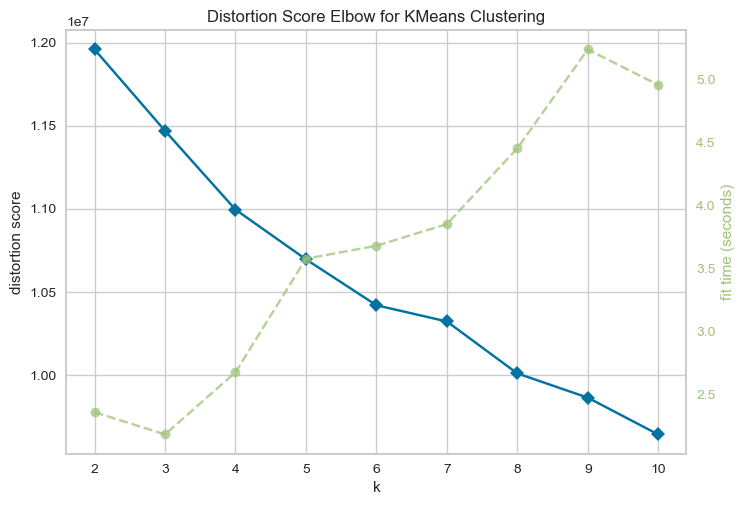

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state = 1)

elb_visualizer_sa1 = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sa1.fit(df_sa_scaled1)    
elb_visualizer_sa1.show()

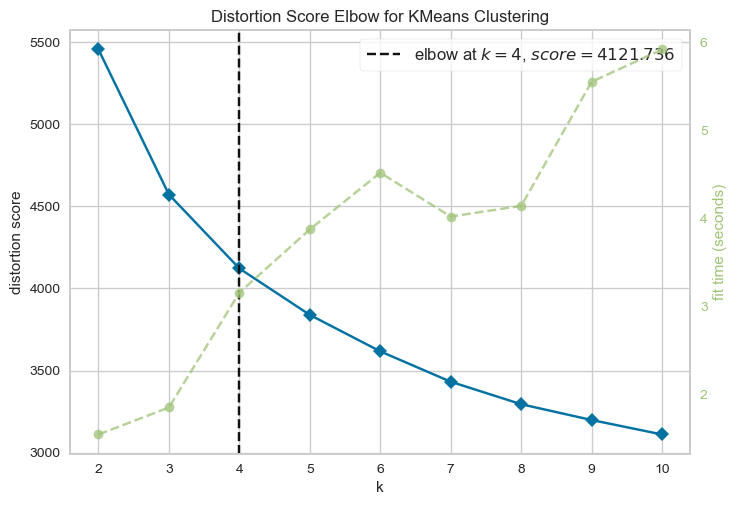

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state = 1)

elb_visualizer_sa2 = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sa2.fit(df_sa_scaled2)    
elb_visualizer_sa2.show()

### Find the Optimal Number of Clusters (Silhouette analysis)

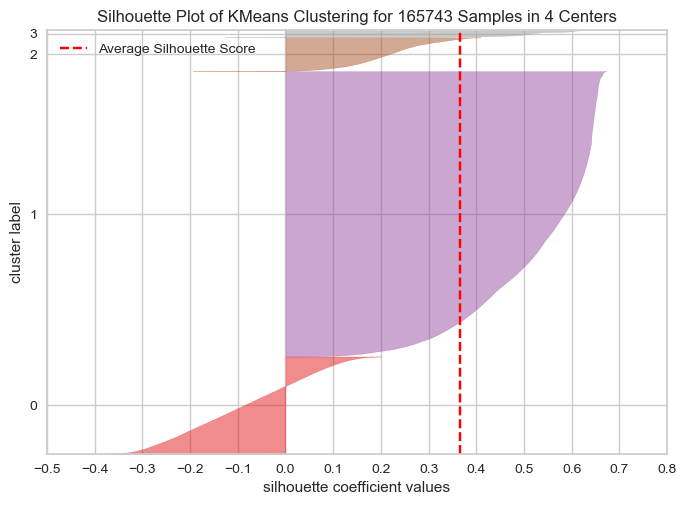

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165743 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_sa3 = SilhouetteVisualizer(model_4clust)
sil_visualizer_sa3.fit(df_sa_scaled2)    
sil_visualizer_sa3.show()

### Perform K-Means Clustering with Optimal K

In [34]:
#append cluster assingments to original DataFrame
df_sa_cat = df_sa_pivot
df_sa_cat['cluster'] = sil_visualizer_sa3.labels_

In [35]:
df_sa_cat.head()

,actorId,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,completed_checklist,completed_document,...,unregistered_certificate_upload,unregistered_checklist,unregistered_elearn,unregistered_page,unregistered_portal_page,unregistered_reward,unregistered_video,updated_interaction,viewed_results,cluster
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1
1,100.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,26.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,89.0,2
2,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1
3,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1
4,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1


## 1) Social Group

### Clustering with Action Features

C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\2675755120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas_new['occurence'] = 1


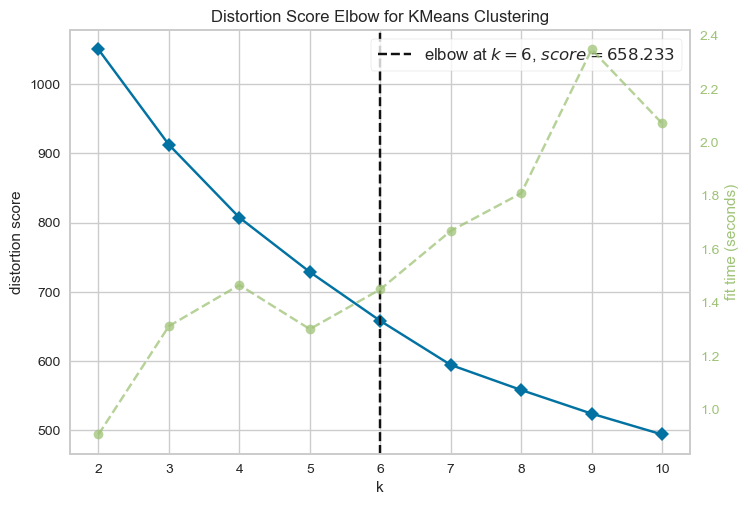

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# select social group
df_staff_action_social = df_staff_action[df_staff_action['social'] == True]

# verb count
vc = df_staff_action_social['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_social_filter = df_staff_action_social[df_staff_action_social['action'].isin(vc_list)]
df_sas_new = df_staff_action_social_filter
df_sas_new['occurence'] = 1

# generate pivot table
df_sas_pivot = pd.pivot_table(df_sas_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sas_pivot = df_sas_pivot.reset_index()

# remove index header
df_sas_pivot = df_sas_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sas_pivot = df_sas_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_sas_noid = df_sas_pivot.loc[:, df_sas_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sas_scaled = pd.DataFrame(scaler.fit_transform(df_sas_noid), columns = df_sas_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sas_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sas_eb.fit(df_sas_scaled)    
elb_visualizer_sas_eb.show()

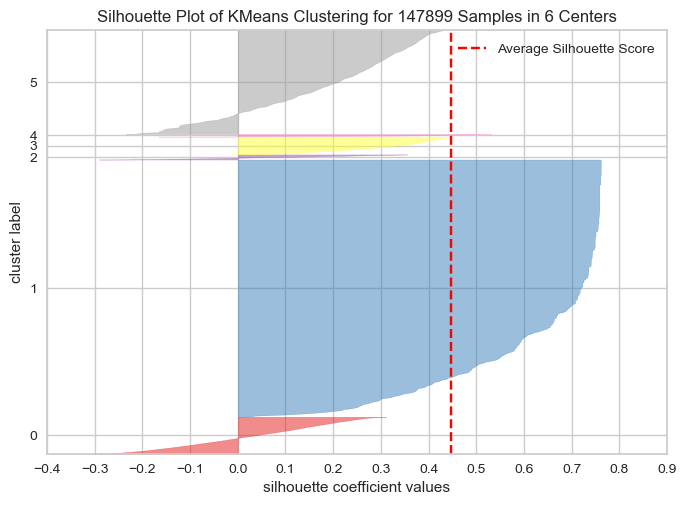

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 147899 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
model_4clust = KMeans(n_clusters = 6, random_state = 1)

sil_visualizer_sas_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sas_sh.fit(df_sas_scaled)    
sil_visualizer_sas_sh.show()

In [38]:
df_sas_cat = df_sas_pivot
df_sas_cat['cluster'] = sil_visualizer_sas_sh.labels_
df_sas_cat.head()

,actorId,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,updated_interaction,cluster
0,10.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100.0,198.0,181.0,0.0,0.0,2.0,20.0,0.0,33.0,1.0,9.0,0.0,0.0,0.0,3.0,0.0,6.0,1.0,0
2,1000.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,10000.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100000.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
# df_sas_summary = df_sas_cat[['rated_lesson', 'experienced_profile', 'rated_course', 'rated_module', 'experienced_team', 'cluster']].groupby("cluster").mean().round()
df_sas_summary = df_sas_cat.groupby("cluster").mean().round()
df_sas_summary['count'] = df_sas_cat.groupby("cluster").size()
df_sas_summary

,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,updated_interaction,count
cluster,,,,,,,,,,,,,,,,,,
0,7.0,2.0,0.0,0.0,4.0,20.0,0.0,6.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12884
1,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89878
2,15.0,7.0,0.0,0.0,2.0,44.0,0.0,7.0,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1780
3,6.0,1.0,1.0,0.0,3.0,14.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6199
4,16.0,3.0,0.0,0.0,6.0,31.0,0.0,73.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,934
5,4.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36224


### Feature Selection by Pearson Correlation & Distance Correlation

In [40]:
rslt_sas1 = df_sas_noid.corr().round(2)
rslt_sas1

,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,updated_interaction
experienced_profile,1.00,0.45,0.06,0.10,0.14,0.20,0.04,0.19,0.12,0.14,0.04,0.08,0.07,0.12,0.07,0.08,0.16
experienced_team,0.45,1.00,0.00,0.09,0.01,0.07,0.03,0.06,0.06,0.04,0.04,0.09,0.11,0.17,0.11,0.14,0.02
rated_assessment,0.06,0.00,1.00,0.04,0.27,0.25,0.01,0.10,0.03,0.12,-0.01,0.00,0.00,0.00,0.01,0.00,0.05
rated_certificate_upload,0.10,0.09,0.04,1.00,0.10,0.12,0.03,0.10,0.03,0.06,0.02,0.01,0.01,0.03,0.02,0.01,0.04
rated_checklist,0.14,0.01,0.27,0.10,1.00,0.57,0.04,0.37,0.02,0.42,-0.01,0.00,0.00,0.01,-0.00,0.00,0.09
rated_elearn,0.20,0.07,0.25,0.12,0.57,1.00,0.06,0.43,0.34,0.64,0.02,0.01,0.01,0.03,0.01,0.01,0.12
rated_external_link,0.04,0.03,0.01,0.03,0.04,0.06,1.00,0.06,0.01,0.07,0.00,0.00,0.00,0.01,0.00,0.01,0.01
rated_page,0.19,0.06,0.10,0.10,0.37,0.43,0.06,1.00,0.07,0.27,0.01,0.01,0.00,0.02,0.01,0.02,0.05
rated_portal_page,0.12,0.06,0.03,0.03,0.02,0.34,0.01,0.07,1.00,0.36,0.00,0.00,0.00,0.01,0.00,0.01,0.05
rated_video,0.14,0.04,0.12,0.06,0.42,0.64,0.07,0.27,0.36,1.00,0.00,0.01,0.00,0.01,0.00,0.01,0.11


<AxesSubplot:>

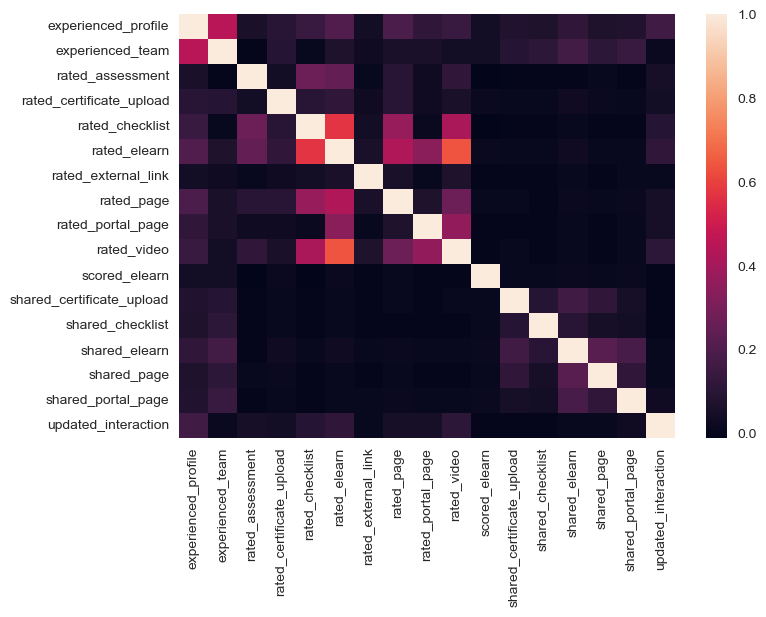

In [41]:
sns.heatmap(rslt_sas1)

In [42]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 
# Apply the distance method pairwise to every column
rslt_sas2 = df_sas_noid.apply(lambda col1: df_sas_noid.apply(lambda col2: distcorr(col1, col2)))
# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt_sas2

,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,updated_interaction
experienced_profile,1.00,0.31,0.09,0.10,0.16,0.24,0.06,0.23,0.15,0.18,0.03,0.07,0.06,0.09,0.10,0.07,0.23
experienced_team,0.31,1.00,0.00,0.10,0.01,0.08,0.08,0.11,0.09,0.05,0.05,0.18,0.16,0.23,0.26,0.18,0.02
rated_assessment,0.09,0.00,1.00,0.05,0.27,0.25,0.01,0.17,0.04,0.17,0.01,0.00,0.00,0.00,0.01,0.00,0.06
rated_certificate_upload,0.10,0.10,0.05,1.00,0.09,0.12,0.04,0.12,0.05,0.07,0.02,0.05,0.02,0.04,0.04,0.02,0.05
rated_checklist,0.16,0.01,0.27,0.09,1.00,0.65,0.04,0.51,0.04,0.54,0.01,0.01,0.00,0.01,0.01,0.01,0.13
rated_elearn,0.24,0.08,0.25,0.12,0.65,1.00,0.06,0.60,0.28,0.67,0.02,0.02,0.01,0.03,0.02,0.01,0.14
rated_external_link,0.06,0.08,0.01,0.04,0.04,0.06,1.00,0.11,0.04,0.07,0.01,0.02,0.01,0.04,0.03,0.03,0.02
rated_page,0.23,0.11,0.17,0.12,0.51,0.60,0.11,1.00,0.18,0.55,0.01,0.02,0.02,0.03,0.03,0.03,0.10
rated_portal_page,0.15,0.09,0.04,0.05,0.04,0.28,0.04,0.18,1.00,0.33,0.01,0.01,0.00,0.02,0.01,0.02,0.05
rated_video,0.18,0.05,0.17,0.07,0.54,0.67,0.07,0.55,0.33,1.00,0.00,0.01,0.01,0.01,0.01,0.01,0.14


<AxesSubplot:>

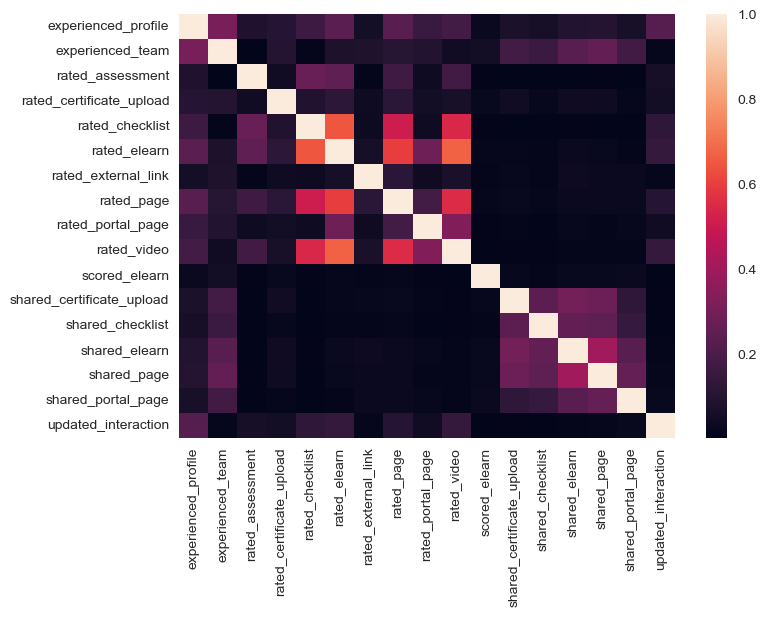

In [43]:
sns.heatmap(rslt_sas2)

### Summarise by verb of action features (merge by verb first)

In [44]:
# unpivot data
df_sas_pivot = pd.pivot_table(df_sas_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sas_pivot = df_sas_pivot.reset_index()

# remove index header
df_sas_pivot = df_sas_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sas_pivot = df_sas_pivot.replace(np.nan, 0)

df_sas_unpivoted = df_sas_pivot.melt(id_vars = ['actorId'], var_name = 'action', value_name = 'count')

# break down action into verb & activity 
# If expand = True, return DataFrame/MultiIndex expanding dimensionality; If expand = False, return Series/Index, containing lists of strings)
df_sas_unpivoted['verb'] = df_sas_unpivoted['action'].str.split('_').str[0]

# sum count by actorId & verb
df_sas_sum = df_sas_unpivoted[['actorId', 'verb', 'count']].groupby(['actorId', 'verb']).sum()
df_sas_sum = df_sas_sum.reset_index()

# generate pivot table
df_sas_pivot_new = pd.pivot_table(df_sas_sum, values = 'count', index = 'actorId', columns = 'verb', aggfunc = 'sum')

# convert pivot table to dataframe
df_sas_pivot_new = df_sas_pivot_new.reset_index()

# remove index header
df_sas_pivot_new = df_sas_pivot_new.rename_axis(None, axis = 1)

# add 'cluster'
df_sas_pivot_new['cluster'] = sil_visualizer_sas_sh.labels_

df_sas_pivot_new.head()

,actorId,experienced,rated,scored,shared,updated,cluster
0,10.0,9.00,0.00,0.00,0.00,0.00,1
1,100.0,379.00,65.00,0.00,9.00,1.00,0
2,1000.0,4.00,1.00,0.00,0.00,0.00,1
3,10000.0,1.00,3.00,0.00,0.00,0.00,1
4,100000.0,1.00,4.00,0.00,0.00,0.00,1


In [45]:
df_sas_pivot_new[['experienced', 'rated', 'scored', 'shared', 'updated']].describe()

,experienced,rated,scored,shared,updated
count,"147,899.00","147,899.00","147,899.00","147,899.00","147,899.00"
mean,5.36,11.19,0.00,0.05,0.07
std,16.46,16.90,0.06,1.49,0.42
min,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00
50%,2.00,5.00,0.00,0.00,0.00
75%,5.00,15.00,0.00,0.00,0.00
max,"1,101.00",304.00,3.00,252.00,19.00


In [46]:
df_sas_summary_new = df_sas_pivot_new.groupby("cluster").mean().round(3)
df_sas_summary_new['count'] = df_sas_pivot_new.groupby("cluster").size()
df_sas_summary_new

,experienced,rated,scored,shared,updated,count
cluster,,,,,,
0,9.38,37.56,0.01,0.09,0.20,12884
1,4.40,2.44,0.00,0.03,0.04,89878
2,21.71,75.11,0.01,0.25,0.29,1780
3,6.76,24.25,0.00,0.07,0.15,6199
4,19.40,112.95,0.00,0.11,0.17,934
5,4.91,15.52,0.01,0.04,0.08,36224


### Clustering by verb of action features

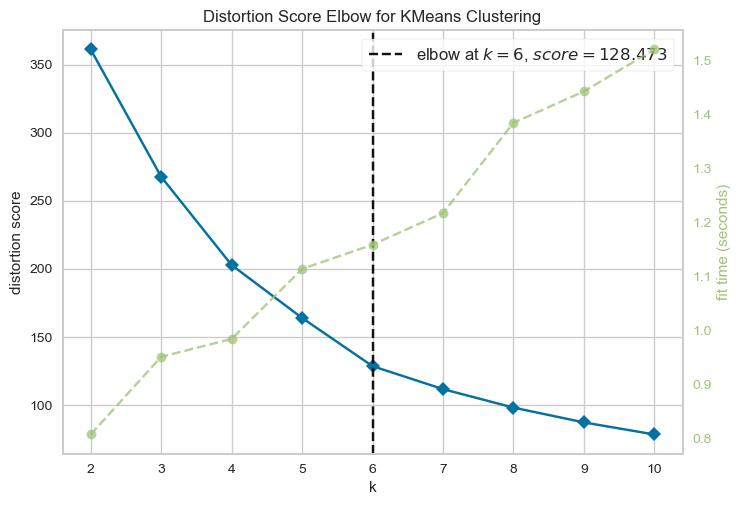

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# drop previous cluster column
if 'cluster' in df_sas_pivot_new.columns:
    df_sas_pivot_new = df_sas_pivot_new.drop(columns = 'cluster')

# generate dataframe without actorId & cluster
df_sas_noid_new = df_sas_pivot_new.loc[:, df_sas_pivot_new.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sas_scaled_new = pd.DataFrame(scaler.fit_transform(df_sas_noid_new), columns = df_sas_noid_new.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sasn_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sasn_eb.fit(df_sas_scaled_new)
elb_visualizer_sasn_eb.show()

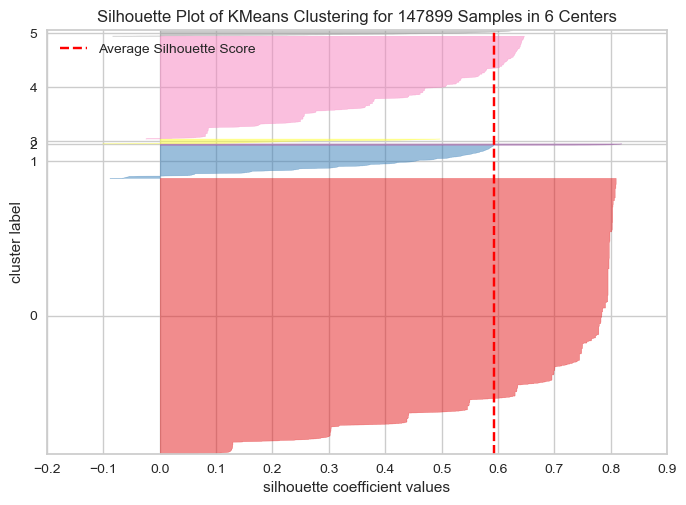

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 147899 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
model_4clust = KMeans(n_clusters = 6, random_state = 1)

sil_visualizer_sasn_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sasn_sh.fit(df_sas_scaled_new)
sil_visualizer_sasn_sh.show()

In [49]:
df_sas_cat_new = df_sas_pivot_new
df_sas_cat_new['cluster'] = sil_visualizer_sasn_sh.labels_
df_sas_cat_new.head()

,actorId,experienced,rated,scored,shared,updated,cluster
0,10.0,9.00,0.00,0.00,0.00,0.00,0
1,100.0,379.00,65.00,0.00,9.00,1.00,1
2,1000.0,4.00,1.00,0.00,0.00,0.00,0
3,10000.0,1.00,3.00,0.00,0.00,0.00,0
4,100000.0,1.00,4.00,0.00,0.00,0.00,0


In [50]:
df_sas_summary_new2 = df_sas_cat_new.groupby("cluster").mean().round(3)
df_sas_summary_new2['count'] = df_sas_cat_new.groupby("cluster").size()
df_sas_summary_new2

,experienced,rated,scored,shared,updated,count
cluster,,,,,,
0,4.20,2.88,0.00,0.03,0.02,96369
1,11.51,43.48,0.00,0.10,0.11,11451
2,16.84,13.63,1.03,0.62,0.07,569
3,13.17,16.65,0.00,0.09,2.96,1701
4,5.07,17.95,0.00,0.04,0.05,35922
5,22.65,105.30,0.00,0.24,0.26,1887


In [51]:
df_sas_summary_new3 = df_sas_cat_new.groupby("cluster").median().round(3)
df_sas_summary_new3['count'] = df_sas_cat_new.groupby("cluster").size()
df_sas_summary_new3

,experienced,rated,scored,shared,updated,count
cluster,,,,,,
0,2.00,2.00,0.00,0.00,0.00,96369
1,5.00,41.00,0.00,0.00,0.00,11451
2,4.00,6.00,1.00,0.00,0.00,569
3,8.00,13.00,0.00,0.00,2.00,1701
4,3.00,17.00,0.00,0.00,0.00,35922
5,11.00,99.00,0.00,0.00,0.00,1887


### Produce Boxplot

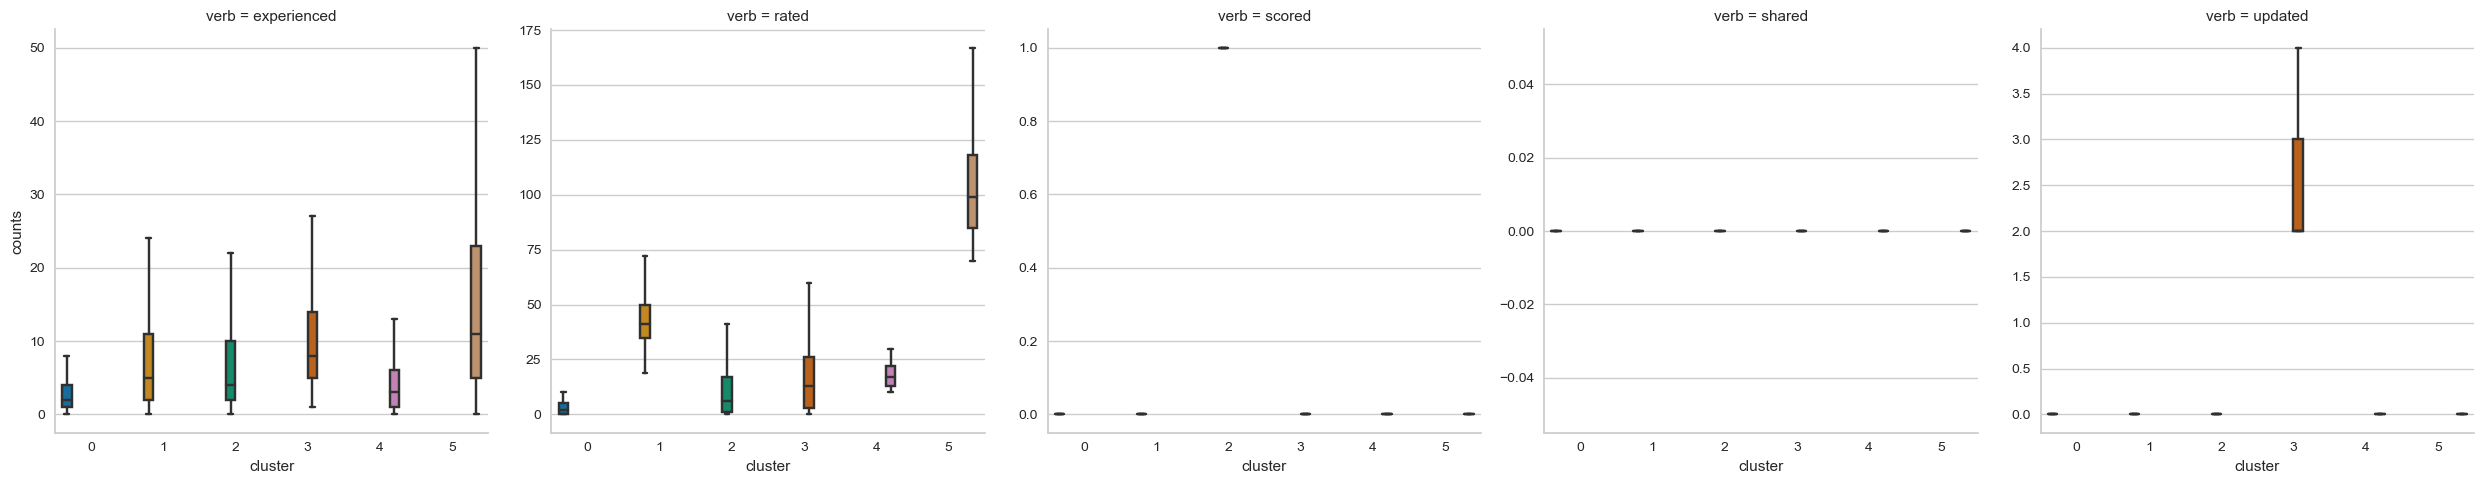

In [87]:
df_sas_cat_new_long = df_sas_cat_new.iloc[:, 1:].melt(id_vars = 'cluster',
                                                      value_vars = df_sas_cat_new.columns[1:6],
                                                      var_name = 'verb',
                                                      value_name = 'counts')

sns.catplot(kind = 'box',
            data = df_sas_cat_new_long, 
            col = 'verb',
            y = 'counts',
            x = 'cluster',
            hue = 'cluster',
            palette = 'colorblind',
            sharey = False,
            showfliers = False) #remove all outliers

plt.tight_layout()
plt.show()

## 2) Exploring Group

C:\Users\lche5\AppData\Local\Temp\ipykernel_15168\1472877407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sae_new['occurence'] = 1


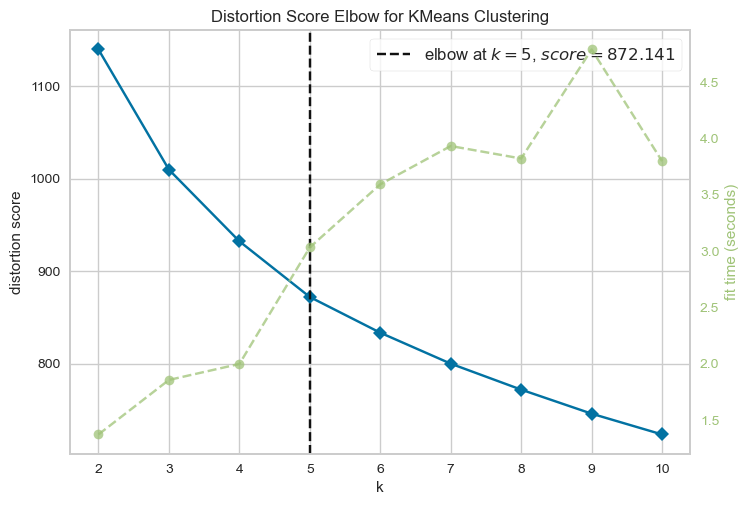

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
df_staff_action_exlore = df_staff_action[df_staff_action['exploring'] == True]

# verb count
vc = df_staff_action_exlore['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_exlore_filter = df_staff_action_exlore[df_staff_action_exlore['action'].isin(vc_list)]

df_sae_new = df_staff_action_exlore_filter
df_sae_new['occurence'] = 1

# generate pivot table
df_sae_pivot = pd.pivot_table(df_sae_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sae_pivot = df_sae_pivot.reset_index()

# remove index header
df_sae_pivot = df_sae_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sae_pivot = df_sae_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_sae_noid = df_sae_pivot.loc[:, df_sae_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sae_scaled = pd.DataFrame(scaler.fit_transform(df_sae_noid), columns = df_sae_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sae_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sae_eb.fit(df_sae_scaled)
elb_visualizer_sae_eb.show()

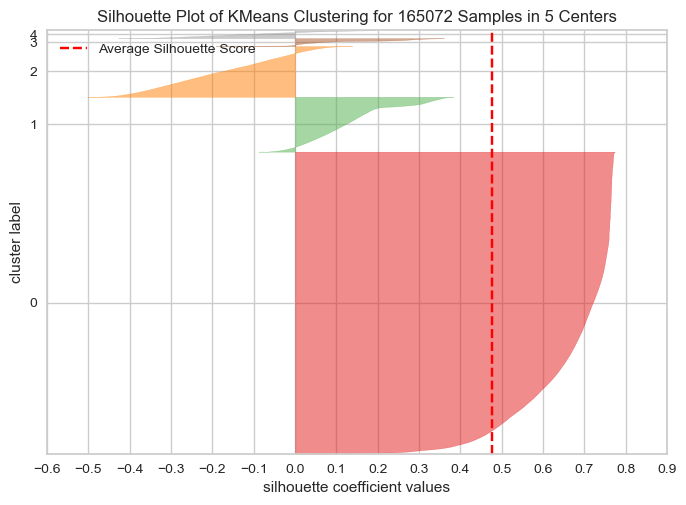

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165072 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [89]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_sae_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sae_sh.fit(df_sae_scaled)    
sil_visualizer_sae_sh.show()

In [90]:
df_sae_cat = df_sae_pivot
df_sae_cat['cluster'] = sil_visualizer_sae_sh.labels_
df_sae_cat.head()

,actorId,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,experienced_dashboard,experienced_elearn,...,registered_elearn,registered_page,registered_portal_page,registered_reward,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results,cluster
0,10.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00,...,2.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00,15.00,1
1,100.0,0.00,0.00,2.00,0.00,0.00,0.00,3.00,171.00,0.00,...,3.00,1.00,1.00,0.00,0.00,89.00,0.00,1.00,89.00,4
2,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,46.00,5.00,0.00,48.00,3
3,10000.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,2.00,0.00,0.00,0.00,0.00,15.00,6.00,0.00,19.00,1
4,100000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,5.00,0


In [92]:
df_sae_summary = df_sae_cat.groupby("cluster").mean().round()
df_sae_summary['count'] = df_sae_cat.groupby("cluster").size()
df_sae_summary

,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,experienced_dashboard,experienced_elearn,experienced_events,...,registered_elearn,registered_page,registered_portal_page,registered_reward,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results,count
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,6.00,117762
1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,2.00,1.00,0.00,0.00,0.00,27.00,2.00,0.00,28.00,21391
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,...,2.00,2.00,0.00,0.00,0.00,40.00,10.00,0.00,42.00,19761
3,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.00,0.00,0.00,...,2.00,1.00,0.00,0.00,0.00,39.00,4.00,0.00,40.00,3086
4,0.00,0.00,2.00,2.00,1.00,0.00,1.00,16.00,1.00,0.00,...,6.00,4.00,2.00,0.00,0.00,168.00,30.00,0.00,174.00,3072


### Feature Selection by Pearson Correlation & Distance Correlation

In [93]:
rslt_sae1 = df_sae_noid.corr().round(2)
rslt_sae1

,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,experienced_dashboard,experienced_elearn,experienced_events,...,registered_checklist,registered_elearn,registered_page,registered_portal_page,registered_reward,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results
assigned_certificate_upload,1.00,0.29,0.18,0.18,0.08,-0.00,0.04,0.28,-0.00,-0.00,...,0.04,0.03,0.04,0.02,-0.00,0.00,0.08,0.02,0.00,0.08
assigned_checklist,0.29,1.00,0.19,0.16,0.16,-0.00,0.04,0.27,-0.00,0.00,...,0.06,0.03,0.03,0.03,-0.00,0.00,0.08,0.01,-0.00,0.08
assigned_elearn,0.18,0.19,1.00,0.60,0.18,0.00,0.04,0.35,-0.00,-0.00,...,0.04,0.05,0.06,0.03,-0.00,0.00,0.10,0.02,0.00,0.10
assigned_page,0.18,0.16,0.60,1.00,0.15,-0.00,0.04,0.33,-0.00,0.00,...,0.04,0.04,0.07,0.02,-0.00,0.00,0.10,0.02,0.00,0.10
assigned_portal_page,0.08,0.16,0.18,0.15,1.00,-0.00,0.04,0.22,-0.00,-0.00,...,0.03,0.03,0.03,0.02,-0.00,0.00,0.06,0.01,0.00,0.06
attempted_elearn,-0.00,-0.00,0.00,-0.00,-0.00,1.00,0.02,0.00,0.00,-0.00,...,0.02,0.02,0.01,0.01,0.01,0.00,0.02,0.02,0.00,0.02
completed_certificate_upload,0.04,0.04,0.04,0.04,0.04,0.02,1.00,0.10,0.03,-0.00,...,0.15,0.15,0.09,0.06,0.00,0.03,0.29,0.06,0.04,0.28
experienced_dashboard,0.28,0.27,0.35,0.33,0.22,0.00,0.10,1.00,-0.01,0.00,...,0.12,0.09,0.11,0.08,0.00,0.01,0.20,0.05,0.02,0.20
experienced_elearn,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.03,-0.01,1.00,-0.00,...,0.00,0.08,0.04,0.01,0.01,0.01,0.07,0.03,0.01,0.07
experienced_events,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,1.00,...,0.00,0.00,0.01,0.01,-0.00,0.00,0.01,0.02,0.00,0.02


<AxesSubplot:>

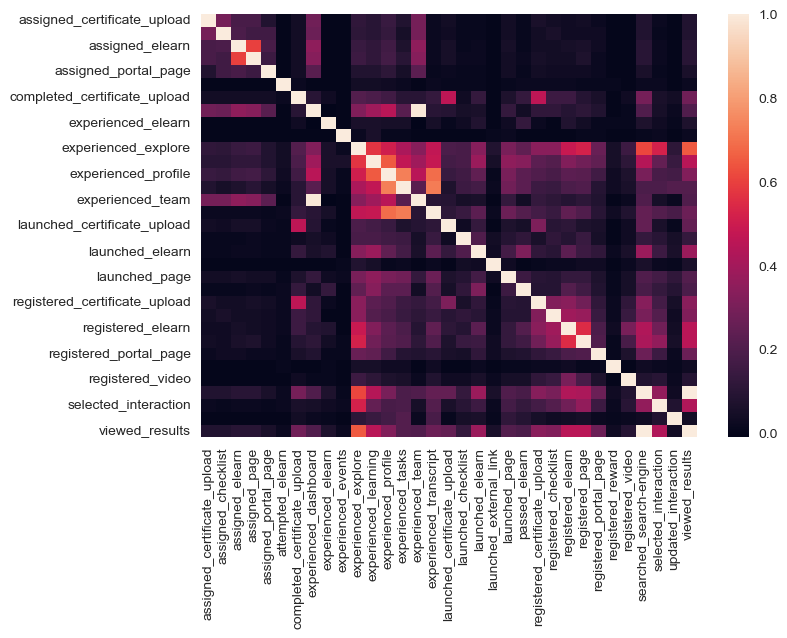

In [94]:
sns.heatmap(rslt_sae1)

In [95]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 
# Apply the distance method pairwise to every column
rslt_sae2 = df_sae_noid.apply(lambda col1: df_sae_noid.apply(lambda col2: distcorr(col1, col2)))
# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt_sae2

,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_page,assigned_portal_page,attempted_elearn,completed_certificate_upload,experienced_dashboard,experienced_elearn,experienced_events,...,registered_checklist,registered_elearn,registered_page,registered_portal_page,registered_reward,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results
assigned_certificate_upload,1.00,0.37,0.49,0.47,0.22,0.00,0.06,0.41,0.00,0.00,...,0.07,0.06,0.07,0.07,0.00,0.01,0.10,0.03,0.01,0.10
assigned_checklist,0.37,1.00,0.40,0.43,0.28,0.00,0.05,0.33,0.00,0.01,...,0.08,0.05,0.05,0.05,0.00,0.01,0.08,0.02,0.00,0.08
assigned_elearn,0.49,0.40,1.00,0.57,0.33,0.00,0.07,0.50,0.00,0.00,...,0.08,0.08,0.08,0.09,0.00,0.01,0.13,0.04,0.00,0.12
assigned_page,0.47,0.43,0.57,1.00,0.35,0.00,0.07,0.51,0.01,0.01,...,0.08,0.08,0.09,0.09,0.00,0.01,0.13,0.04,0.00,0.13
assigned_portal_page,0.22,0.28,0.33,0.35,1.00,0.00,0.04,0.27,0.00,0.00,...,0.04,0.04,0.05,0.05,0.00,0.01,0.06,0.01,0.01,0.06
attempted_elearn,0.00,0.00,0.00,0.00,0.00,1.00,0.04,0.01,0.02,0.00,...,0.03,0.03,0.02,0.02,0.04,0.02,0.03,0.04,0.01,0.03
completed_certificate_upload,0.06,0.05,0.07,0.07,0.04,0.04,1.00,0.10,0.12,0.01,...,0.16,0.26,0.11,0.10,0.01,0.04,0.36,0.10,0.04,0.36
experienced_dashboard,0.41,0.33,0.50,0.51,0.27,0.01,0.10,1.00,0.02,0.01,...,0.12,0.12,0.12,0.13,0.00,0.03,0.19,0.08,0.02,0.19
experienced_elearn,0.00,0.00,0.00,0.01,0.00,0.02,0.12,0.02,1.00,0.01,...,0.02,0.25,0.11,0.03,0.01,0.03,0.17,0.07,0.03,0.18
experienced_events,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,1.00,...,0.01,0.01,0.02,0.02,0.00,0.01,0.02,0.02,0.01,0.02


<AxesSubplot:>

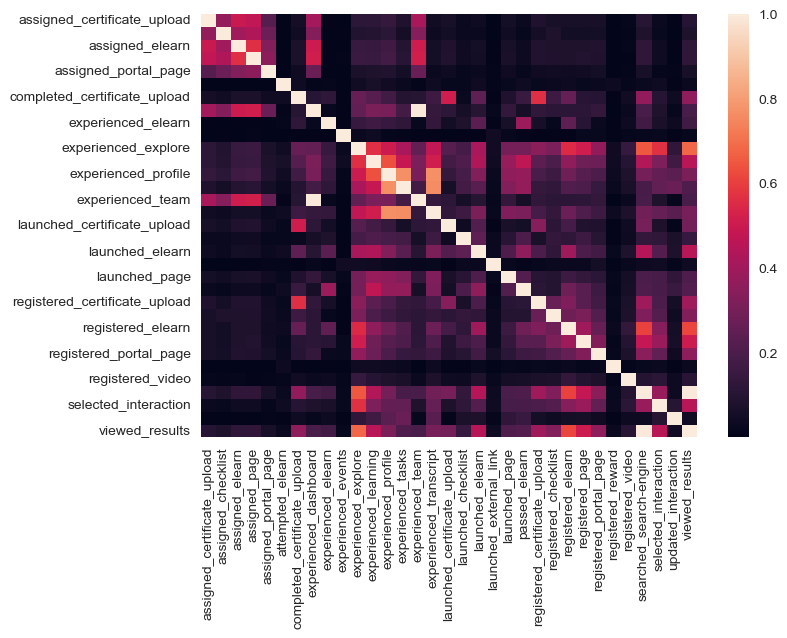

In [96]:
sns.heatmap(rslt_sae2)

### Clustering by verb of action features

In [105]:
# drop previous cluster column
if 'cluster' in df_sae_pivot.columns:
    df_sae_pivot = df_sae_pivot.drop(columns = 'cluster')

# unpivot data
df_sae_unpivoted = df_sae_pivot.melt(id_vars = ['actorId'], var_name = 'action', value_name = 'count')

# break down action into verb & activity
df_sae_unpivoted['verb'] = df_sae_unpivoted['action'].str.split('_').str[0]

# sum count by actorId & verb
df_sae_sum = df_sae_unpivoted[['actorId', 'verb', 'count']].groupby(['actorId', 'verb']).sum()
df_sae_sum = df_sae_sum.reset_index()

# generate pivot table
df_sae_pivot_new = pd.pivot_table(df_sae_sum, values = 'count', index = 'actorId', columns = 'verb', aggfunc = 'sum')

# convert pivot table to dataframe
df_sae_pivot_new = df_sae_pivot_new.reset_index()

# remove index header
df_sae_pivot_new = df_sae_pivot_new.rename_axis(None, axis = 1)

df_sae_pivot_new.head()

,actorId,assigned,attempted,completed,experienced,launched,passed,registered,searched,selected,updated,viewed
0,10.0,0.00,0.00,1.00,42.00,9.00,2.00,3.00,15.00,0.00,0.00,15.00
1,100.0,2.00,0.00,3.00,857.00,6.00,2.00,5.00,89.00,0.00,1.00,89.00
2,1000.0,0.00,0.00,3.00,57.00,8.00,10.00,3.00,46.00,5.00,0.00,48.00
3,10000.0,0.00,0.00,1.00,18.00,0.00,1.00,3.00,15.00,6.00,0.00,19.00
4,100000.0,0.00,0.00,0.00,16.00,3.00,0.00,0.00,5.00,0.00,0.00,5.00


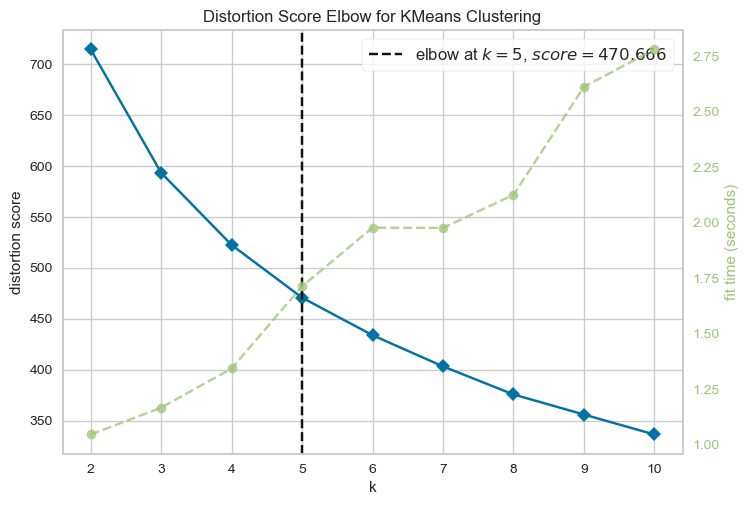

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# generate dataframe without actorId
df_sae_noid_new = df_sae_pivot_new.loc[:, df_sae_pivot_new.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sae_scaled_new = pd.DataFrame(scaler.fit_transform(df_sae_noid_new), columns = df_sae_noid_new.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_saen_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_saen_eb.fit(df_sae_scaled_new)
elb_visualizer_saen_eb.show()

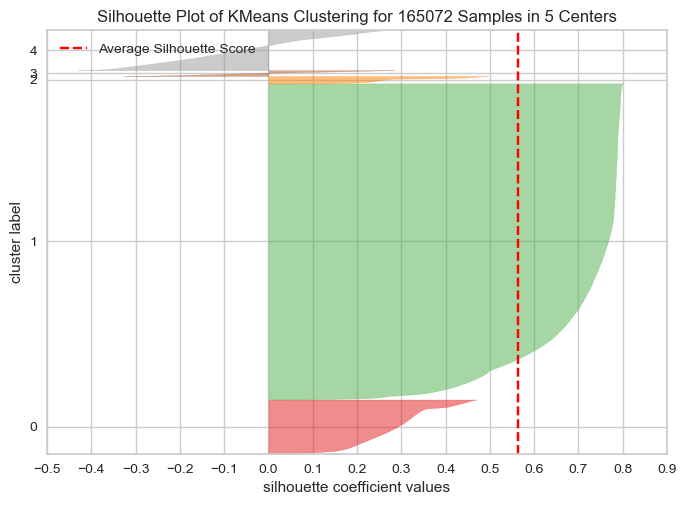

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165072 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [108]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_saen_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_saen_sh.fit(df_sae_scaled_new)
sil_visualizer_saen_sh.show()

In [109]:
df_sae_cat_new = df_sae_pivot_new
df_sae_cat_new['cluster'] = sil_visualizer_saen_sh.labels_
df_sae_cat_new.head()

,actorId,assigned,attempted,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,cluster
0,10.0,0.00,0.00,1.00,42.00,9.00,2.00,3.00,15.00,0.00,0.00,15.00,0
1,100.0,2.00,0.00,3.00,857.00,6.00,2.00,5.00,89.00,0.00,1.00,89.00,2
2,1000.0,0.00,0.00,3.00,57.00,8.00,10.00,3.00,46.00,5.00,0.00,48.00,2
3,10000.0,0.00,0.00,1.00,18.00,0.00,1.00,3.00,15.00,6.00,0.00,19.00,0
4,100000.0,0.00,0.00,0.00,16.00,3.00,0.00,0.00,5.00,0.00,0.00,5.00,1


In [112]:
df_sae_summary_new1 = df_sae_cat_new.groupby("cluster").mean().round(3)
df_sae_summary_new1['count'] = df_sae_cat_new.groupby("cluster").size()
df_sae_summary_new1

,assigned,attempted,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,count
cluster,,,,,,,,,,,,
0,0.08,0.01,1.22,44.95,3.27,7.85,3.31,25.03,2.29,0.05,25.70,21117
1,0.01,0.00,0.00,26.18,1.15,4.09,0.97,5.90,1.10,0.04,6.25,123253
2,0.99,0.00,3.69,79.10,5.07,8.94,5.15,38.23,4.21,0.18,39.41,2886
3,6.09,0.01,0.90,209.66,16.46,15.90,14.91,190.21,32.45,0.16,197.12,2248
4,0.40,0.01,0.12,92.01,6.66,12.15,6.31,55.55,11.79,0.20,58.83,15568


In [113]:
df_sae_summary_new2 = df_sae_cat_new.groupby("cluster").median().round(3)
df_sae_summary_new2['count'] = df_sae_cat_new.groupby("cluster").size()
df_sae_summary_new2

,assigned,attempted,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,count
cluster,,,,,,,,,,,,
0,0.00,0.00,1.00,33.00,2.00,3.00,2.00,20.00,0.00,0.00,21.00,21117
1,0.00,0.00,0.00,18.00,0.00,2.00,0.00,1.00,0.00,0.00,2.00,123253
2,0.00,0.00,3.00,53.00,4.00,8.00,4.00,26.00,0.00,0.00,27.50,2886
3,0.00,0.00,1.00,128.00,9.00,8.00,11.00,168.50,12.00,0.00,174.00,2248
4,0.00,0.00,0.00,66.00,4.00,6.00,5.00,51.00,4.00,0.00,53.00,15568


### Produce Boxplot

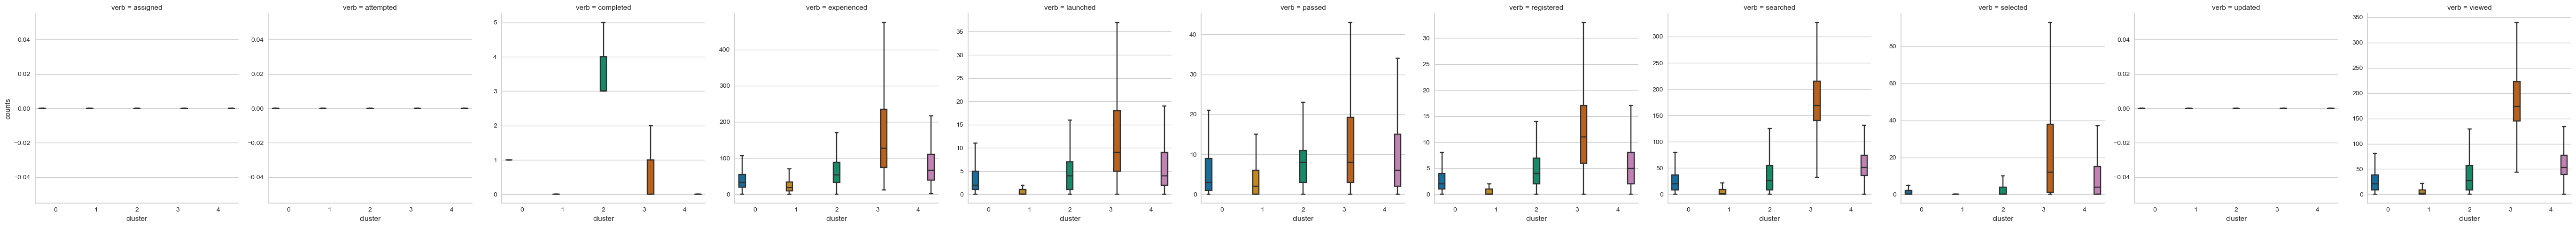

In [111]:
df_sae_cat_new_long = df_sae_cat_new.iloc[:, 1:].melt(id_vars = 'cluster',
                                                      value_vars = df_sae_cat_new.columns[1:12],
                                                      var_name = 'verb',
                                                      value_name = 'counts')

sns.catplot(kind = 'box',
            data = df_sae_cat_new_long, 
            col = 'verb',
            y = 'counts',
            x = 'cluster',
            hue = 'cluster',
            palette = 'colorblind',
            sharey = False,
            showfliers = False) #remove all outliers

plt.tight_layout()
plt.show()

## 3) Learning Group

# Manager Dataset

In [52]:
# fill NaN with ''
df_manager = df_manager.fillna('')

# add 'combined' column
df_manager['combined'] = df_manager['verb'] + "|" + df_manager['type'] + "|" + df_manager['activity'] + "|" + df_manager['CMS Type']

# merge with verb-activity group
df_manager_action = pd.merge(df_manager[['actorId', 'combined']], df_va[['unique_values', 'action', 'social', 'exploring', 'learning']], left_on = 'combined', right_on = 'unique_values', how = 'left')
df_manager_action = df_manager_action[['actorId', 'action', 'social', 'exploring', 'learning']]

In [53]:
# verb count
vc = df_manager_action['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_manager_action_filter = df_manager_action[df_manager_action['action'].isin(vc_list)]

df_ma_new = df_manager_action_filter
df_ma_new['occurence'] = 1

# generate pivot table
df_ma_pivot = pd.pivot_table(df_ma_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_ma_pivot = df_ma_pivot.reset_index()

# remove index header
df_ma_pivot = df_ma_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_ma_pivot = df_ma_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_ma_noid = df_ma_pivot.loc[:, df_ma_pivot.columns != 'actorId']

# Normalisation: range between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
df_ma_scaled = pd.DataFrame(scaler.fit_transform(df_ma_noid), columns = df_ma_noid.columns)

C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\3395941469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma_new['occurence'] = 1


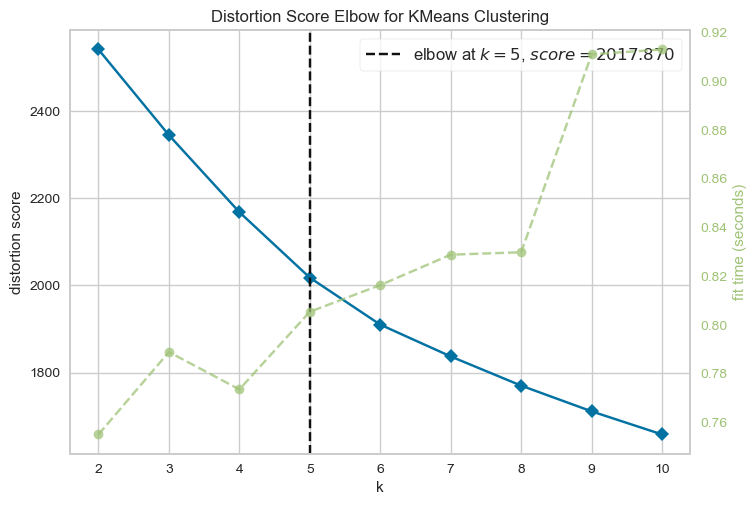

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans(random_state = 1)

elb_visualizer_ma_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_ma_eb.fit(df_ma_scaled)    
elb_visualizer_ma_eb.show()

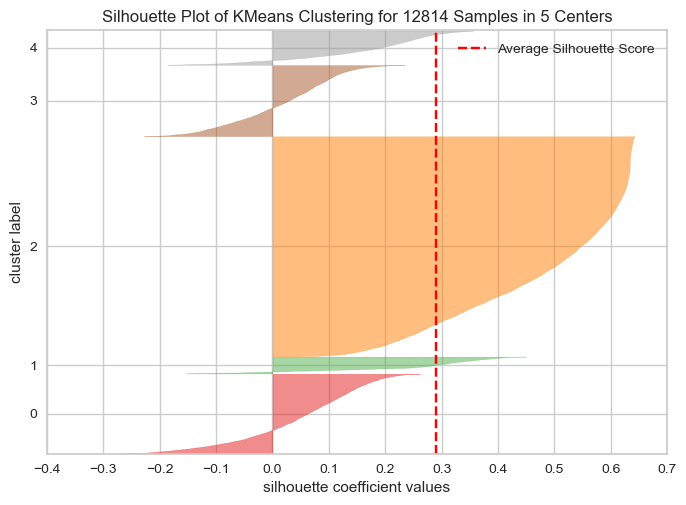

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12814 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_ma_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_ma_sh.fit(df_ma_scaled)    
sil_visualizer_ma_sh.show()

## 1) Social Group

### Clustering with Action Features

C:\Users\lche5\AppData\Local\Temp\ipykernel_15168\1616209808.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mas_new['occurence'] = 1


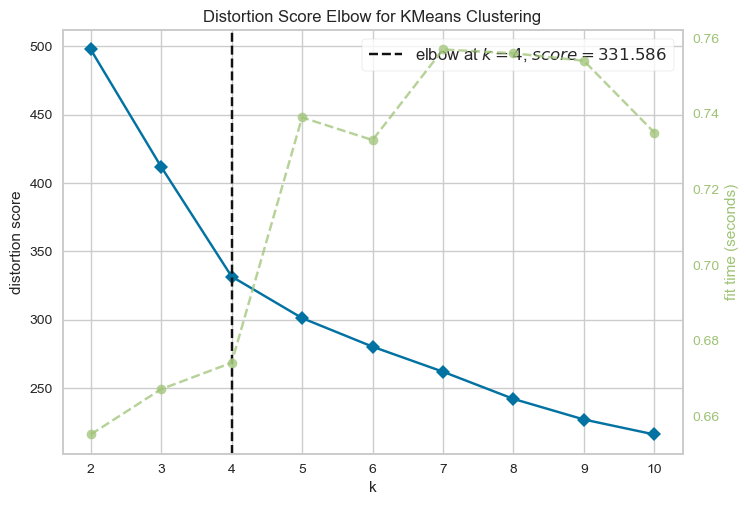

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
# select social group
df_manager_action_social = df_manager_action[df_manager_action['social'] == True]

# verb count
vc = df_manager_action_social['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_manager_action_social_filter = df_manager_action_social[df_manager_action_social['action'].isin(vc_list)]
df_mas_new = df_manager_action_social_filter
df_mas_new['occurence'] = 1

# generate pivot table
df_mas_pivot = pd.pivot_table(df_mas_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_mas_pivot = df_mas_pivot.reset_index()

# remove index header
df_mas_pivot = df_mas_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_mas_pivot = df_mas_pivot.replace(np.nan, 0) # df_manager_pivot.fillna(0)

# generate dataframe without actorId
df_mas_noid = df_mas_pivot.loc[:, df_mas_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_mas_scaled = pd.DataFrame(scaler.fit_transform(df_mas_noid), columns = df_mas_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_mas_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_mas_eb.fit(df_mas_scaled)    
elb_visualizer_mas_eb.show()

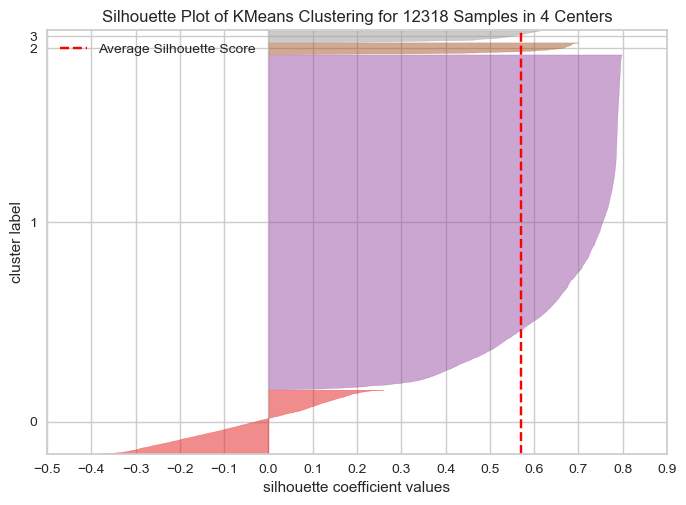

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12318 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [116]:
model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_mas_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_mas_sh.fit(df_mas_scaled)    
sil_visualizer_mas_sh.show()

### Feature Selection by Pearson Correlation & Distance Correlation

In [117]:
rslt_mas1 = df_mas_noid.corr().round(2)
rslt_mas1

,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,shared_video,updated_interaction
experienced_profile,1.00,0.75,0.02,0.22,0.20,0.20,0.07,0.17,0.15,0.17,0.04,0.14,0.13,0.16,0.16,0.12,0.03,0.09
experienced_team,0.75,1.00,0.00,0.20,0.21,0.20,0.07,0.21,0.20,0.16,0.02,0.11,0.10,0.14,0.12,0.08,0.02,0.08
rated_assessment,0.02,0.00,1.00,0.02,0.07,0.15,0.04,0.06,0.01,0.10,0.00,-0.01,-0.00,-0.01,-0.01,-0.01,0.01,0.02
rated_certificate_upload,0.22,0.20,0.02,1.00,0.21,0.27,0.05,0.16,0.15,0.12,0.03,0.04,0.05,0.06,0.07,0.05,0.02,0.04
rated_checklist,0.20,0.21,0.07,0.21,1.00,0.53,0.13,0.55,0.16,0.26,-0.00,0.03,0.04,0.03,0.06,0.03,0.01,0.06
rated_elearn,0.20,0.20,0.15,0.27,0.53,1.00,0.16,0.59,0.40,0.41,0.03,0.03,0.03,0.04,0.05,0.06,0.01,0.09
rated_external_link,0.07,0.07,0.04,0.05,0.13,0.16,1.00,0.18,0.09,0.22,0.00,-0.00,0.01,0.02,0.01,0.00,0.04,0.05
rated_page,0.17,0.21,0.06,0.16,0.55,0.59,0.18,1.00,0.27,0.31,0.01,0.01,0.02,0.02,0.03,0.04,0.01,0.04
rated_portal_page,0.15,0.20,0.01,0.15,0.16,0.40,0.09,0.27,1.00,0.27,-0.01,0.01,0.02,0.01,0.04,0.02,-0.00,0.05
rated_video,0.17,0.16,0.10,0.12,0.26,0.41,0.22,0.31,0.27,1.00,0.03,0.01,0.02,0.02,0.05,0.02,0.02,0.04


<AxesSubplot:>

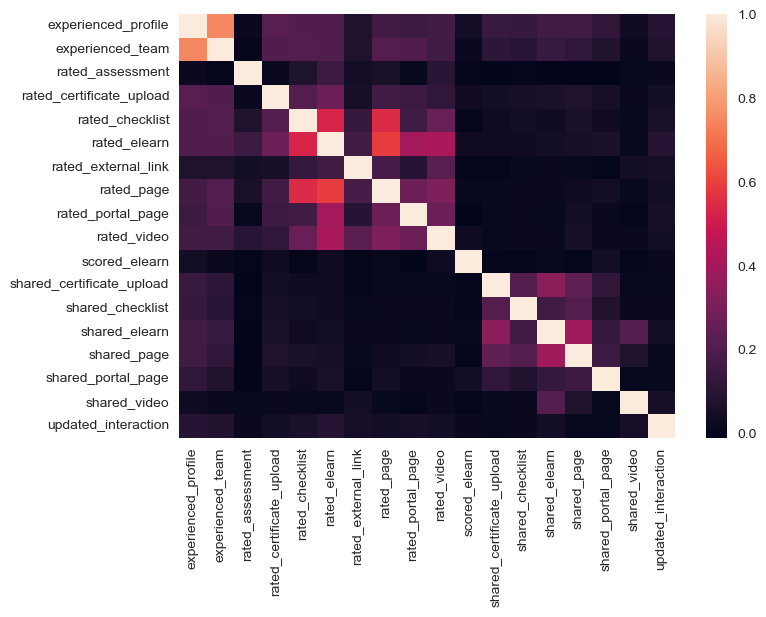

In [118]:
sns.heatmap(rslt_mas1)

In [119]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 
# Apply the distance method pairwise to every column
rslt_mas2 = df_mas_noid.apply(lambda col1: df_mas_noid.apply(lambda col2: distcorr(col1, col2)))
# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt_mas2

,experienced_profile,experienced_team,rated_assessment,rated_certificate_upload,rated_checklist,rated_elearn,rated_external_link,rated_page,rated_portal_page,rated_video,scored_elearn,shared_certificate_upload,shared_checklist,shared_elearn,shared_page,shared_portal_page,shared_video,updated_interaction
experienced_profile,1.00,0.79,0.02,0.20,0.24,0.21,0.11,0.23,0.19,0.22,0.06,0.17,0.14,0.21,0.21,0.15,0.05,0.11
experienced_team,0.79,1.00,0.01,0.19,0.22,0.22,0.10,0.22,0.23,0.22,0.03,0.14,0.12,0.20,0.18,0.13,0.04,0.10
rated_assessment,0.02,0.01,1.00,0.03,0.12,0.15,0.04,0.09,0.04,0.12,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.02
rated_certificate_upload,0.20,0.19,0.03,1.00,0.25,0.25,0.08,0.21,0.18,0.19,0.03,0.06,0.07,0.09,0.09,0.08,0.02,0.06
rated_checklist,0.24,0.22,0.12,0.25,1.00,0.59,0.16,0.52,0.21,0.41,0.02,0.05,0.05,0.07,0.07,0.05,0.02,0.08
rated_elearn,0.21,0.22,0.15,0.25,0.59,1.00,0.22,0.65,0.41,0.64,0.03,0.04,0.04,0.07,0.06,0.06,0.02,0.10
rated_external_link,0.11,0.10,0.04,0.08,0.16,0.22,1.00,0.35,0.18,0.31,0.01,0.01,0.03,0.03,0.03,0.02,0.04,0.05
rated_page,0.23,0.22,0.09,0.21,0.52,0.65,0.35,1.00,0.38,0.58,0.03,0.03,0.03,0.06,0.06,0.06,0.02,0.07
rated_portal_page,0.19,0.23,0.04,0.18,0.21,0.41,0.18,0.38,1.00,0.44,0.01,0.03,0.03,0.05,0.05,0.05,0.01,0.06
rated_video,0.22,0.22,0.12,0.19,0.41,0.64,0.31,0.58,0.44,1.00,0.03,0.03,0.04,0.05,0.06,0.05,0.03,0.09


<AxesSubplot:>

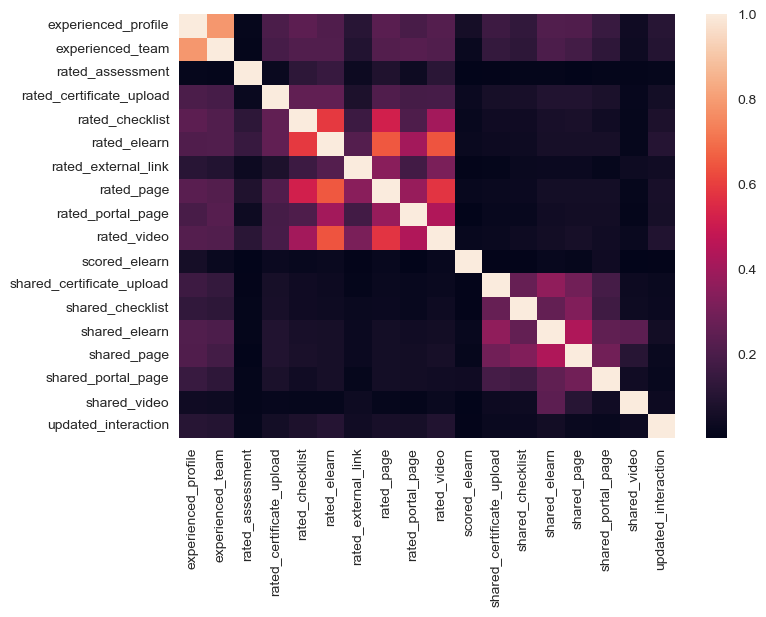

In [120]:
sns.heatmap(rslt_mas2)

### Clustering by verb of action features

In [125]:
# drop previous cluster column
if 'cluster' in df_mas_pivot.columns:
    df_mas_pivot = df_mas_pivot.drop(columns = 'cluster')

# unpivot data
df_mas_unpivoted = df_mas_pivot.melt(id_vars = ['actorId'], var_name = 'action', value_name = 'count')

# break down action into verb & activity
df_mas_unpivoted['verb'] = df_mas_unpivoted['action'].str.split('_').str[0]

# sum count by actorId & verb
df_mas_sum = df_mas_unpivoted[['actorId', 'verb', 'count']].groupby(['actorId', 'verb']).sum()
df_mas_sum = df_mas_sum.reset_index()

# generate pivot table
df_mas_pivot_new = pd.pivot_table(df_mas_sum, values = 'count', index = 'actorId', columns = 'verb', aggfunc = 'sum')

# convert pivot table to dataframe
df_mas_pivot_new = df_mas_pivot_new.reset_index()

# remove index header
df_mas_pivot_new = df_mas_pivot_new.rename_axis(None, axis = 1)

df_mas_pivot_new.head()

,actorId,experienced,rated,scored,shared,updated
0,0.0,215.00,32.00,0.00,0.00,0.00
1,1.0,250.00,42.00,0.00,0.00,0.00
2,10.0,267.00,0.00,0.00,0.00,0.00
3,10002.0,153.00,17.00,0.00,0.00,0.00
4,100061.0,38.00,9.00,0.00,0.00,0.00


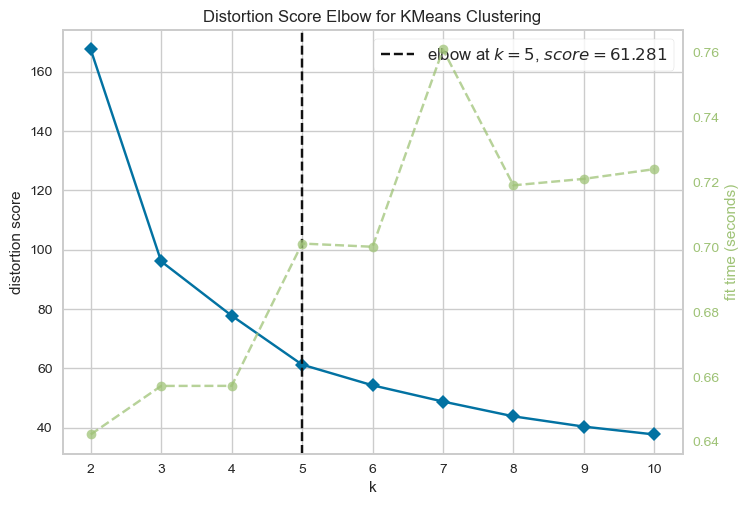

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
# generate dataframe without actorId
df_mas_noid_new = df_mas_pivot_new.loc[:, df_mas_pivot_new.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_mas_scaled_new = pd.DataFrame(scaler.fit_transform(df_mas_noid_new), columns = df_mas_noid_new.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_masn_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_masn_eb.fit(df_mas_scaled_new)
elb_visualizer_masn_eb.show()

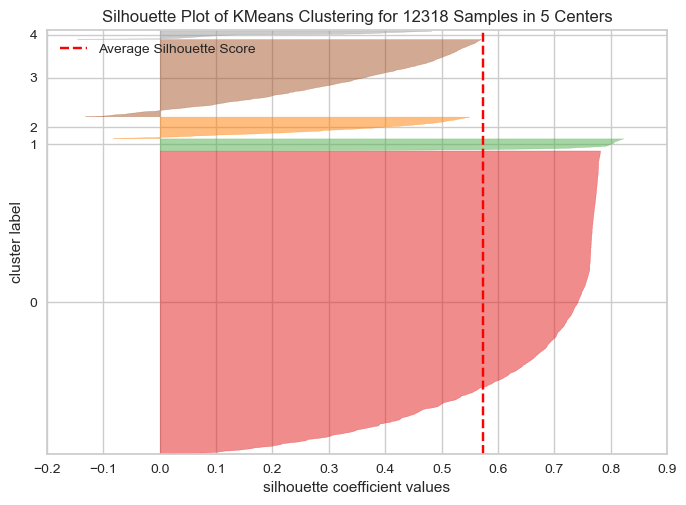

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12318 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [127]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_masn_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_masn_sh.fit(df_mas_scaled_new)
sil_visualizer_masn_sh.show()

In [128]:
df_mas_cat_new = df_mas_pivot_new
df_mas_cat_new['cluster'] = sil_visualizer_masn_sh.labels_
df_mas_cat_new.head()

,actorId,experienced,rated,scored,shared,updated,cluster
0,0.0,215.00,32.00,0.00,0.00,0.00,3
1,1.0,250.00,42.00,0.00,0.00,0.00,3
2,10.0,267.00,0.00,0.00,0.00,0.00,0
3,10002.0,153.00,17.00,0.00,0.00,0.00,0
4,100061.0,38.00,9.00,0.00,0.00,0.00,0


In [129]:
df_mas_summary_new1 = df_mas_cat_new.groupby("cluster").mean().round(3)
df_mas_summary_new1['count'] = df_mas_cat_new.groupby("cluster").size()
df_mas_summary_new1

,experienced,rated,scored,shared,updated,count
cluster,,,,,,
0,85.18,5.42,0.00,0.88,0.03,8854
1,136.59,22.12,1.01,1.71,0.10,343
2,227.26,109.67,0.00,2.02,0.14,627
3,163.79,45.13,0.00,2.26,0.06,2255
4,181.49,22.61,0.01,2.16,3.24,239


In [130]:
df_mas_summary_new2 = df_mas_cat_new.groupby("cluster").median().round(3)
df_mas_summary_new2['count'] = df_mas_cat_new.groupby("cluster").size()
df_mas_summary_new2

,experienced,rated,scored,shared,updated,count
cluster,,,,,,
0,45.00,2.00,0.00,0.00,0.00,8854
1,92.00,10.00,1.00,0.00,0.00,343
2,167.00,101.00,0.00,0.00,0.00,627
3,112.00,43.00,0.00,0.00,0.00,2255
4,124.00,12.00,0.00,0.00,2.00,239


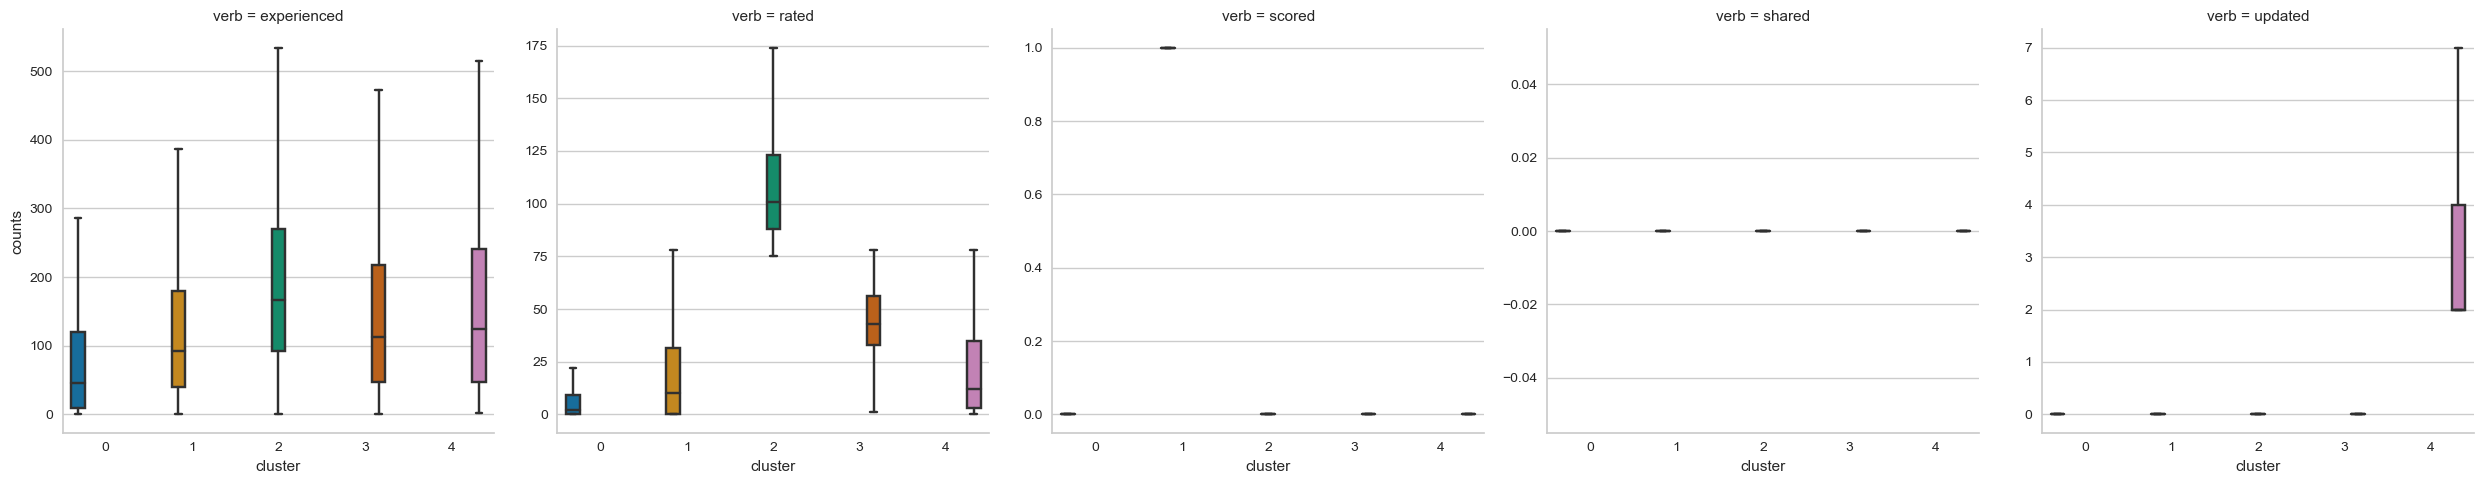

In [131]:
df_mas_cat_new_long = df_mas_cat_new.iloc[:, 1:].melt(id_vars = 'cluster',
                                                      value_vars = df_mas_cat_new.columns[1:6],
                                                      var_name = 'verb',
                                                      value_name = 'counts')

sns.catplot(kind = 'box',
            data = df_mas_cat_new_long, 
            col = 'verb',
            y = 'counts',
            x = 'cluster',
            hue = 'cluster',
            palette = 'colorblind',
            sharey = False,
            showfliers = False) #remove all outliers

plt.tight_layout()
plt.show()

## 2） Exploring

### Clustering with Action Features

C:\Users\lche5\AppData\Local\Temp\ipykernel_15216\846707661.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mae_new['occurence'] = 1


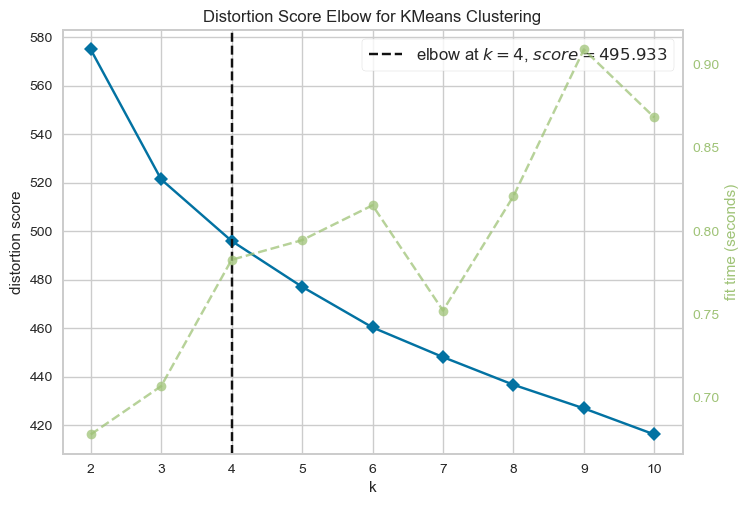

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# select social group
df_manager_action_exlore = df_manager_action[df_manager_action['exploring'] == True]

# verb count
vc = df_manager_action_exlore['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_manager_action_exlore_filter = df_manager_action_exlore[df_manager_action_exlore['action'].isin(vc_list)]

df_mae_new = df_manager_action_exlore_filter
df_mae_new['occurence'] = 1

# generate pivot table
df_mae_pivot = pd.pivot_table(df_mae_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_mae_pivot = df_mae_pivot.reset_index()

# remove index header
df_mae_pivot = df_mae_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_mae_pivot = df_mae_pivot.replace(np.nan, 0) # df_manager_pivot.fillna(0)

# generate dataframe without actorId
df_mae_noid = df_mae_pivot.loc[:, df_mae_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_mae_scaled = pd.DataFrame(scaler.fit_transform(df_mae_noid), columns = df_mae_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_mae_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_mae_eb.fit(df_mae_scaled)
elb_visualizer_mae_eb.show()

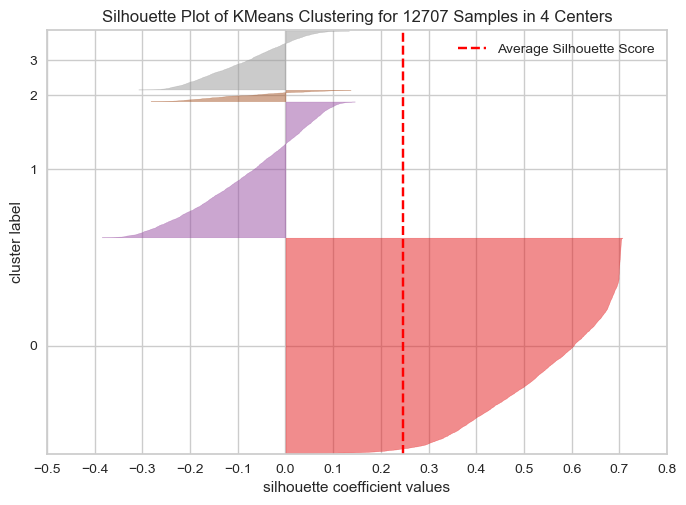

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12707 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_mae_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_mae_sh.fit(df_mae_scaled)    
sil_visualizer_mae_sh.show()

### Feature Selection by Pearson Correlation & Distance Correlation

In [59]:
rslt_mae1 = df_mae_noid.corr().round(2)
rslt_mae1

,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_event,assigned_page,assigned_portal_page,assigned_video,completed_certificate_upload,experienced_dashboard,experienced_elearn,...,registered_certificate_upload,registered_checklist,registered_elearn,registered_page,registered_portal_page,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results
assigned_certificate_upload,1.00,0.09,0.39,0.01,0.14,0.06,0.01,0.06,0.10,0.01,...,0.08,0.04,0.06,0.06,0.03,0.02,0.10,0.03,0.01,0.10
assigned_checklist,0.09,1.00,0.16,0.00,0.30,0.13,0.00,0.05,0.14,-0.01,...,0.12,0.14,0.10,0.13,0.06,0.03,0.17,0.07,0.01,0.17
assigned_elearn,0.39,0.16,1.00,0.12,0.30,0.21,0.11,0.10,0.14,0.04,...,0.11,0.08,0.16,0.11,0.06,0.05,0.18,0.06,0.02,0.18
assigned_event,0.01,0.00,0.12,1.00,0.24,0.12,0.90,-0.00,0.01,-0.00,...,-0.00,0.01,0.02,0.01,0.02,0.04,0.03,0.03,-0.00,0.03
assigned_page,0.14,0.30,0.30,0.24,1.00,0.21,0.24,0.10,0.19,0.01,...,0.13,0.12,0.15,0.19,0.09,0.03,0.22,0.07,0.02,0.22
assigned_portal_page,0.06,0.13,0.21,0.12,0.21,1.00,0.11,0.08,0.13,0.02,...,0.13,0.12,0.10,0.10,0.09,0.02,0.14,0.04,0.02,0.14
assigned_video,0.01,0.00,0.11,0.90,0.24,0.11,1.00,0.00,0.01,-0.00,...,-0.00,0.01,0.03,0.02,0.01,0.03,0.03,0.03,-0.00,0.03
completed_certificate_upload,0.06,0.05,0.10,-0.00,0.10,0.08,0.00,1.00,0.26,0.06,...,0.44,0.16,0.27,0.24,0.14,0.06,0.38,0.10,0.04,0.38
experienced_dashboard,0.10,0.14,0.14,0.01,0.19,0.13,0.01,0.26,1.00,0.07,...,0.30,0.23,0.34,0.33,0.19,0.11,0.50,0.25,0.08,0.51
experienced_elearn,0.01,-0.01,0.04,-0.00,0.01,0.02,-0.00,0.06,0.07,1.00,...,0.05,0.02,0.09,0.04,0.02,0.02,0.10,0.06,0.02,0.10


<AxesSubplot:>

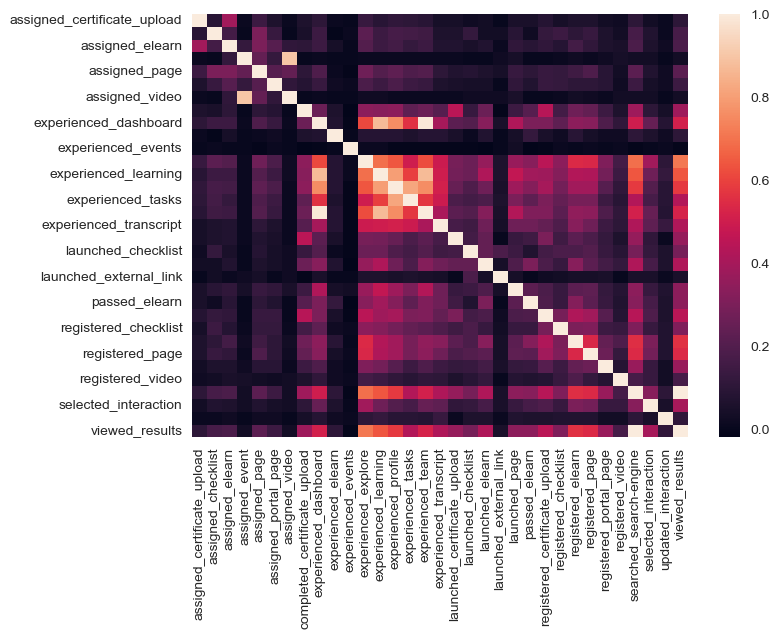

In [60]:
sns.heatmap(rslt_mae1)

In [61]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 
# Apply the distance method pairwise to every column
rslt_mae2 = df_mae_noid.apply(lambda col1: df_mae_noid.apply(lambda col2: distcorr(col1, col2)))
# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt_mae2

,assigned_certificate_upload,assigned_checklist,assigned_elearn,assigned_event,assigned_page,assigned_portal_page,assigned_video,completed_certificate_upload,experienced_dashboard,experienced_elearn,...,registered_certificate_upload,registered_checklist,registered_elearn,registered_page,registered_portal_page,registered_video,searched_search-engine,selected_interaction,updated_interaction,viewed_results
assigned_certificate_upload,1.00,0.25,0.36,0.04,0.26,0.18,0.05,0.17,0.24,0.09,...,0.21,0.14,0.17,0.16,0.14,0.06,0.25,0.08,0.03,0.25
assigned_checklist,0.25,1.00,0.26,0.02,0.33,0.20,0.02,0.10,0.25,0.01,...,0.19,0.28,0.18,0.21,0.16,0.05,0.25,0.10,0.03,0.25
assigned_elearn,0.36,0.26,1.00,0.12,0.38,0.23,0.10,0.21,0.31,0.17,...,0.22,0.17,0.30,0.22,0.16,0.08,0.33,0.11,0.05,0.33
assigned_event,0.04,0.02,0.12,1.00,0.14,0.12,0.83,0.01,0.02,0.01,...,0.01,0.02,0.03,0.02,0.03,0.06,0.03,0.04,0.01,0.03
assigned_page,0.26,0.33,0.38,0.14,1.00,0.27,0.14,0.18,0.32,0.09,...,0.23,0.22,0.27,0.30,0.20,0.05,0.34,0.13,0.04,0.34
assigned_portal_page,0.18,0.20,0.23,0.12,0.27,1.00,0.10,0.13,0.20,0.03,...,0.17,0.14,0.16,0.16,0.19,0.04,0.21,0.07,0.04,0.21
assigned_video,0.05,0.02,0.10,0.83,0.14,0.10,1.00,0.01,0.03,0.00,...,0.01,0.03,0.04,0.03,0.03,0.05,0.03,0.03,0.00,0.03
completed_certificate_upload,0.17,0.10,0.21,0.01,0.18,0.13,0.01,1.00,0.32,0.18,...,0.53,0.23,0.34,0.28,0.21,0.06,0.44,0.12,0.04,0.44
experienced_dashboard,0.24,0.25,0.31,0.02,0.32,0.20,0.03,0.32,1.00,0.16,...,0.34,0.31,0.41,0.38,0.27,0.11,0.56,0.26,0.10,0.56
experienced_elearn,0.09,0.01,0.17,0.01,0.09,0.03,0.00,0.18,0.16,1.00,...,0.10,0.04,0.24,0.10,0.06,0.04,0.23,0.08,0.06,0.23


<AxesSubplot:>

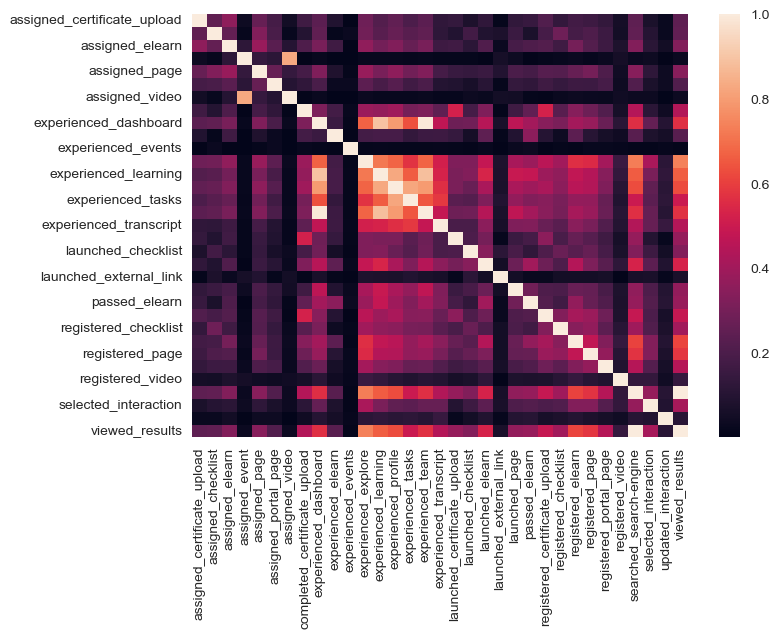

In [62]:
sns.heatmap(rslt_mae2)

### Clustering by verb of action features

In [63]:
# drop previous cluster column
if 'cluster' in df_mae_pivot.columns:
    df_mae_pivot = df_mae_pivot.drop(columns = 'cluster')

# unpivot data
df_mae_unpivoted = df_mae_pivot.melt(id_vars = ['actorId'], var_name = 'action', value_name = 'count')

# break down action into verb & activity
df_mae_unpivoted['verb'] = df_mae_unpivoted['action'].str.split('_').str[0]

# sum count by actorId & verb
df_mae_sum = df_mae_unpivoted[['actorId', 'verb', 'count']].groupby(['actorId', 'verb']).sum()
df_mae_sum = df_mae_sum.reset_index()

# generate pivot table
df_mae_pivot_new = pd.pivot_table(df_mae_sum, values = 'count', index = 'actorId', columns = 'verb', aggfunc = 'sum')

# convert pivot table to dataframe
df_mae_pivot_new = df_mae_pivot_new.reset_index()

# remove index header
df_mae_pivot_new = df_mae_pivot_new.rename_axis(None, axis = 1)

df_mae_pivot_new.head()

,actorId,assigned,completed,experienced,launched,passed,registered,searched,selected,updated,viewed
0,0.0,18.00,1.00,670.00,12.00,16.00,19.00,135.00,1.00,0.00,136.00
1,1.0,12.00,2.00,611.00,2.00,4.00,3.00,34.00,0.00,0.00,34.00
2,10.0,1.00,1.00,853.00,9.00,20.00,17.00,117.00,1.00,0.00,118.00
3,10002.0,1.00,1.00,387.00,1.00,3.00,3.00,80.00,38.00,0.00,89.00
4,100061.0,0.00,0.00,117.00,0.00,2.00,0.00,9.00,0.00,0.00,9.00


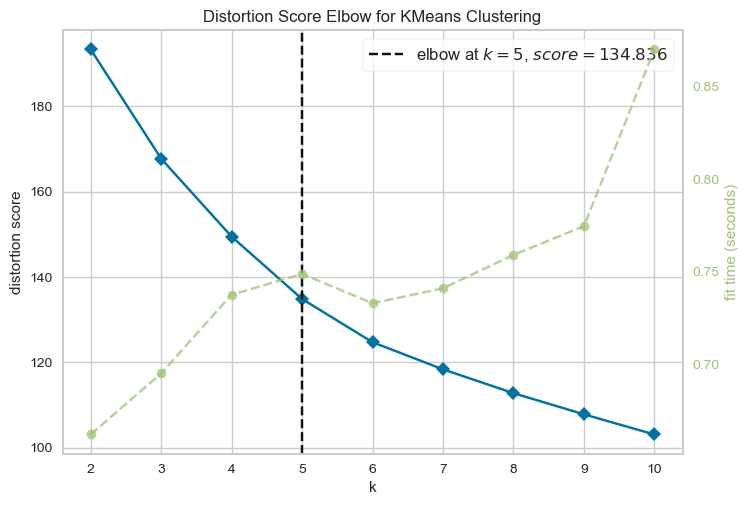

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# generate dataframe without actorId
df_mae_noid_new = df_mae_pivot_new.loc[:, df_mae_pivot_new.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_mae_scaled_new = pd.DataFrame(scaler.fit_transform(df_mae_noid_new), columns = df_mae_noid_new.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_maen_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_maen_eb.fit(df_mae_scaled_new)
elb_visualizer_maen_eb.show()

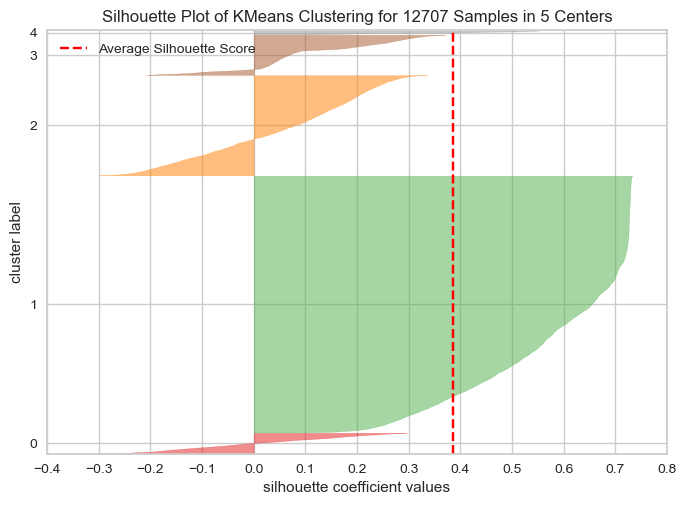

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12707 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_maen_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_maen_sh.fit(df_mae_scaled_new)
sil_visualizer_maen_sh.show()

In [66]:
df_mae_cat_new = df_mae_pivot_new
df_mae_cat_new['cluster'] = sil_visualizer_maen_sh.labels_
df_mae_cat_new.head()

,actorId,assigned,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,cluster
0,0.0,18.00,1.00,670.00,12.00,16.00,19.00,135.00,1.00,0.00,136.00,0
1,1.0,12.00,2.00,611.00,2.00,4.00,3.00,34.00,0.00,0.00,34.00,3
2,10.0,1.00,1.00,853.00,9.00,20.00,17.00,117.00,1.00,0.00,118.00,2
3,10002.0,1.00,1.00,387.00,1.00,3.00,3.00,80.00,38.00,0.00,89.00,2
4,100061.0,0.00,0.00,117.00,0.00,2.00,0.00,9.00,0.00,0.00,9.00,1


In [67]:
df_mae_summary_new1 = df_mae_cat_new.groupby("cluster").mean().round(3)
df_mae_summary_new1['count'] = df_mae_cat_new.groupby("cluster").size()
df_mae_summary_new1

,assigned,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,count
cluster,,,,,,,,,,,
0,25.74,1.46,"1,045.87",16.87,15.44,23.97,220.75,21.76,0.19,227.19,620
1,0.72,0.16,146.83,1.78,2.68,1.48,17.23,1.98,0.04,17.84,7743
2,8.77,0.43,495.80,7.82,7.43,7.77,89.81,8.80,0.09,92.15,3019
3,8.88,2.76,505.69,8.58,8.67,7.55,90.16,5.98,0.07,91.85,1206
4,6.12,0.62,544.09,7.18,7.36,6.32,83.89,7.83,4.55,85.91,119


In [68]:
df_mae_summary_new2 = df_mae_cat_new.groupby("cluster").median().round(3)
df_mae_summary_new2['count'] = df_mae_cat_new.groupby("cluster").size()
df_mae_summary_new2

,assigned,completed,experienced,launched,passed,registered,searched,selected,updated,viewed,count
cluster,,,,,,,,,,,
0,8.00,1.00,889.50,13.00,12.00,21.00,203.00,9.00,0.00,210.50,620
1,0.00,0.00,88.00,1.00,1.00,1.00,11.00,0.00,0.00,12.00,7743
2,0.00,0.00,429.00,6.00,3.00,7.00,80.00,3.00,0.00,83.00,3019
3,0.00,2.00,429.00,7.00,4.00,7.00,81.00,0.00,0.00,82.50,1206
4,0.00,0.00,440.00,5.00,5.00,5.00,71.00,3.00,4.00,73.00,119


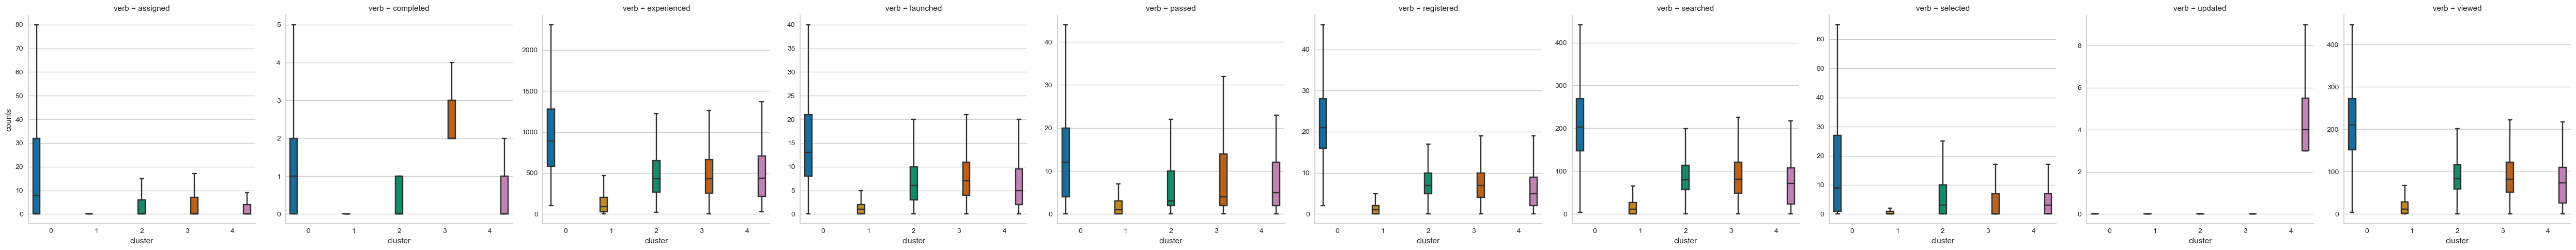

In [69]:
df_mae_cat_new_long = df_mae_cat_new.iloc[:, 1:].melt(id_vars = 'cluster',
                                                      value_vars = df_mae_cat_new.columns[1:11],
                                                      var_name = 'verb',
                                                      value_name = 'counts')

sns.catplot(kind = 'box',
            data = df_mae_cat_new_long, 
            col = 'verb',
            y = 'counts',
            x = 'cluster',
            hue = 'cluster',
            palette = 'colorblind',
            sharey = False,
            showfliers = False) #remove all outliers

plt.tight_layout()
plt.show()